# **Hackathon: Shinkansen Travel Experience**

## **Organization**

This project has 3 notebook files.

1. Data_preparation_TheNormals_Hackathon
2. Model_Building_TheNormals_Hackathon
3. Prediction_TheNormals_Hackathon

This notebook is the second notebook where data stored in .csv file in 1st notebook, is read and various models are built. The best performing models are stored to be used in the next notebook for prediction.

## **Problem Statement**

This problem is to determine passengers' experience, whether they are deligighted or not after their travel on the Shinkansen Bullet Train in Japan. This machine learning exercise aims to determine the relative importance of each parameter about their contribution to the passengers' overall travel experience. The dataset contains a random sample of individuals who traveled on this train. The on-time performance of the trains along with passenger information is published in a file named 'Traveldata_train.csv'.  These passengers were later asked to provide their feedback on various parameters related to the travel along with their overall experience. These collected details are made available in the survey report labeled 'Surveydata_train.csv'.

In the survey, each passenger was explicitly asked whether they were satisfied with their overall travel experience or not, and that is captured in the data of the survey report under the variable labeled 'Overall_Experience', which is the target variable.

The objective of this problem is to understand which parameters play an important role in swaying passenger feedback towards a positive scale. We are provided with test data containing the travel data and the survey data of passengers. Both the test data and the train data are collected at the same time and belong to the same population.

## **Solution**

The given problem statement suggests that the problem is a Supervised learning classification problem. We will use various Machine Learning models available in the library for classification and observe which model gives us the best accuracy on the test set and select it as our final model.

### **Loading Libraries**



In [ ]:
# install scikeras if not already installed for KerasClassifier wrapper to work
!pip install scikeras

In [ ]:
# install optuna
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 1.4 MB/s eta 0:00:00


In [ ]:
!pip3 install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.9 MB/s eta 0:00:00


In [ ]:
# libraries for data manipulation
import pandas as pd
import numpy as np

# libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# library to prettu print python datastructures
from pprint import pprint

# library for train test split
from sklearn.model_selection import train_test_split

# library to impute missing values
from sklearn.impute import KNNImputer

# library for scaling data
from sklearn.preprocessing import MinMaxScaler

# library for metrics
from sklearn.metrics import accuracy_score

# libraries for GridSearchCV and RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# library to optuna
import optuna

# libraries for cross validation
from sklearn.model_selection import cross_val_score, KFold

# library for Logistic Regression
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier

# library fro KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# library for Decision Tree
from sklearn.tree import DecisionTreeClassifier

# library for ensemble models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier

# library for Naive Bayes based models
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# library for neural network
from sklearn.neural_network import MLPClassifier

# library for Discriminant Analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# library for XGBoostClassifier model
from xgboost import XGBClassifier

# libraries for Artificial Neural Network
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.callbacks import ReduceLROnPlateau

# clearing the backend session
from tensorflow.keras import backend

# library to load Sequential model
from tensorflow.keras.models import load_model,save_model

# library for lightgbm
from lightgbm import LGBMClassifier

# library to import for Catboost
import catboost as cb
from catboost import CatBoostClassifier

# library for random number generator
import random

# library to save and load files
import joblib

# ignore Warnings
import warnings
warnings.filterwarnings("ignore")

### **Reading train dataframe from .csv file**



In [ ]:
# mount google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read df_train from .csv files
df_train = pd.read_csv('/content/drive/MyDrive/DScourse/Hackathon/KNN3/train_data.csv')

In [ ]:
# read df_test from .csv files
# while we do not use df_test, we need to use the same MinMaxScaler to scale it.
# hence we will scale the df_test and
# store it as df_test_scaled to be used in the next notebook for prediction
df_pred = pd.read_csv('/content/drive/MyDrive/DScourse/Hackathon/KNN3/pred_data.csv')

### **Data Preprocessing**



In [ ]:
df_train.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,1.0,1.0,52.0,NaN,1,272,0.0,5.0,0,...,4.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,2.0,1.0
1,98800002,0.0,1.0,48.0,0.0,0,2200,9.0,0.0,0,...,4.0,1.0,4.0,4.0,5.0,2.0,1.0,2.0,4.0,4.0
2,98800003,1.0,1.0,43.0,1.0,1,1061,77.0,119.0,1,...,2.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0
3,98800004,1.0,1.0,44.0,1.0,1,780,13.0,18.0,0,...,3.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0
4,98800005,1.0,1.0,50.0,1.0,1,1981,0.0,0.0,1,...,2.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [ ]:
df_pred.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,1.0,NaN,36.0,1.0,1,532,0.0,0.0,3.0,...,2.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,1.0
1,99900002,1.0,0.0,21.0,1.0,1,1425,9.0,28.0,0.0,...,3.0,1.0,3.0,3.0,5.0,3.0,4.0,3.0,5.0,3.0
2,99900003,0.0,1.0,60.0,1.0,1,2832,0.0,0.0,5.0,...,5.0,5.0,5.0,2.0,2.0,2.0,2.0,4.0,2.0,5.0
3,99900004,1.0,1.0,29.0,0.0,0,1352,0.0,0.0,3.0,...,1.0,3.0,5.0,1.0,3.0,2.0,5.0,5.0,5.0,1.0
4,99900005,0.0,0.0,18.0,1.0,1,1610,17.0,0.0,5.0,...,5.0,5.0,5.0,5.0,NaN,3.0,5.0,5.0,5.0,5.0


We will deal with `df_train` for model building and will use `df_test` later for predicting with our best model.

#### **Seperate Train and Test data**



In [ ]:
# saving a copy of df_train for future reference
df_train_copy = df_train.copy()

# splitting X, y
X = df_train.drop(['ID','Overall_Experience'], axis = 1)
y = df_train['Overall_Experience']

In [ ]:
X.shape, y.shape

((94379, 23), (94379,))

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((66065, 23), (28314, 23), (66065,), (28314,))

#### **Impute Missing values**



In [ ]:
# creating a copy of test data
df_pred_orig = df_pred.copy()

In [ ]:
# checking for missing values
X_train.isnull().sum()[X_train.isnull().sum() != 0], X_test.isnull().sum()[X_test.isnull().sum() != 0], df_pred.isnull().sum()[df_pred.isnull().sum() != 0]

(Gender                       61
 Customer_Type              6284
 Age                          26
 Type_Travel                6403
 Departure_Delay_in_Mins      41
 Arrival_Delay_in_Mins       256
 Seat_Comfort                 49
 Arrival_Time_Convenient    6275
 Catering                   6153
 Platform_Location            18
 Onboard_Wifi_Service         18
 Onboard_Entertainment        10
 Online_Support               60
 Ease_of_Online_Booking       50
 Onboard_Service            5225
 Legroom                      61
 Baggage_Handling            101
 CheckIn_Service              56
 Cleanliness                   5
 Online_Boarding               5
 dtype: int64,
 Gender                       16
 Customer_Type              2667
 Age                           7
 Type_Travel                2823
 Departure_Delay_in_Mins      16
 Arrival_Delay_in_Mins       101
 Seat_Comfort                 12
 Arrival_Time_Convenient    2655
 Catering                   2588
 Platform_Location          

In [ ]:
# making ID column index to be retained in original prediction dataframe
df_pred.set_index('ID', inplace = True)

In [ ]:
df_pred.head()

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
ID,,,,,,,,,,,,,,,,,,,,,
99900001,1.0,NaN,36.0,1.0,1,532,0.0,0.0,3.0,1,...,2.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,1.0
99900002,1.0,0.0,21.0,1.0,1,1425,9.0,28.0,0.0,0,...,3.0,1.0,3.0,3.0,5.0,3.0,4.0,3.0,5.0,3.0
99900003,0.0,1.0,60.0,1.0,1,2832,0.0,0.0,5.0,0,...,5.0,5.0,5.0,2.0,2.0,2.0,2.0,4.0,2.0,5.0
99900004,1.0,1.0,29.0,0.0,0,1352,0.0,0.0,3.0,1,...,1.0,3.0,5.0,1.0,3.0,2.0,5.0,5.0,5.0,1.0
99900005,0.0,0.0,18.0,1.0,1,1610,17.0,0.0,5.0,0,...,5.0,5.0,5.0,5.0,NaN,3.0,5.0,5.0,5.0,5.0


In [ ]:
# declaring KNNImputer
imputer = KNNImputer(n_neighbors=14)

# imputing missing values
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns = X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns = X_test.columns)
df_pred_imputed = pd.DataFrame(imputer.transform(df_pred), columns = df_pred.columns)

In [ ]:
# checking for null values
X_train_imputed.isnull().sum()[X_train_imputed.isnull().sum() != 0], X_test_imputed.isnull().sum()[X_test_imputed.isnull().sum() != 0],  df_pred_imputed.isnull().sum()[df_pred_imputed.isnull().sum() != 0]

(Series([], dtype: int64), Series([], dtype: int64), Series([], dtype: int64))

In [ ]:
df_pred_imputed.head()

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,1.0,1.0,36.0,1.0,1.0,532.0,0.0,0.0,3.0,1.0,...,2.0,5.0,4.0,5.0,5.000000,5.0,5.0,4.0,5.0,1.0
1,1.0,0.0,21.0,1.0,1.0,1425.0,9.0,28.0,0.0,0.0,...,3.0,1.0,3.0,3.0,5.000000,3.0,4.0,3.0,5.0,3.0
2,0.0,1.0,60.0,1.0,1.0,2832.0,0.0,0.0,5.0,0.0,...,5.0,5.0,5.0,2.0,2.000000,2.0,2.0,4.0,2.0,5.0
3,1.0,1.0,29.0,0.0,0.0,1352.0,0.0,0.0,3.0,1.0,...,1.0,3.0,5.0,1.0,3.000000,2.0,5.0,5.0,5.0,1.0
4,0.0,0.0,18.0,1.0,1.0,1610.0,17.0,0.0,5.0,0.0,...,5.0,5.0,5.0,5.0,3.714286,3.0,5.0,5.0,5.0,5.0


#### **Binning**



Creating Age Bins

In [ ]:
# bin df_train['Age'] into 4 bins
#X_train_imputed['Age_Bins'] = pd.cut(X_train_imputed['Age'], bins = [0, 20, 40, 60, float('inf')], labels = ['0-20', '21-40', '41-60', '61+'])
#X_train_imputed['Age_Bins'].replace(['0-20', '21-40', '41-60', '61+'], [0, 1, 2, 3], inplace = True)

#X_test_imputed['Age_Bins'] = pd.cut(X_test_imputed['Age'], bins = [0, 20, 40, 60, float('inf')], labels = ['0-20', '21-40', '41-60', '61+'])
#X_test_imputed['Age_Bins'].replace(['0-20', '21-40', '41-60', '61+'], [0, 1, 2, 3], inplace = True)

#df_pred_imputed['Age_Bins'] = pd.cut(df_pred_imputed['Age'], bins = [0, 20, 40, 60, float('inf')], labels = ['0-20', '21-40', '41-60', '61+'])
#df_pred_imputed['Age_Bins'].replace(['0-20', '21-40', '41-60', '61+'], [0, 1, 2, 3], inplace = True)

In [ ]:
#X_train_imputed['Age_Bins'].value_counts(), X_test_imputed['Age_Bins'].value_counts(), df_pred_imputed['Age_Bins'].value_counts()

Creating Arrival_Delay_Bins

In [ ]:
# bin 'Arrival_Delay_in_Mins' into 4 bins
X_train_imputed['Arrival_Delay_Bins'] = pd.cut(X_train_imputed['Arrival_Delay_in_Mins'], bins = [-float('inf'), 0, 10, 120, float('inf')], labels = ['0', '1-10', '11-120', '121+'])
X_train_imputed['Arrival_Delay_Bins'].replace(['0', '1-10', '11-120', '121+'], [0, 1, 2, 3], inplace = True)

X_test_imputed['Arrival_Delay_Bins'] = pd.cut(X_test_imputed['Arrival_Delay_in_Mins'], bins = [-float('inf'), 0, 10, 120, float('inf')], labels = ['0', '1-10', '11-120', '121+'])
X_test_imputed['Arrival_Delay_Bins'].replace(['0', '1-10', '11-120', '121+'], [0, 1, 2, 3], inplace = True)

df_pred_imputed['Arrival_Delay_Bins'] = pd.cut(df_pred_imputed['Arrival_Delay_in_Mins'], bins = [-float('inf'), 0, 10, 120, float('inf')], labels = ['0', '1-10', '11-120', '121+'])
df_pred_imputed['Arrival_Delay_Bins'].replace(['0', '1-10', '11-120', '121+'], [0, 1, 2, 3], inplace = True)

Creating Total_Delay Bins

In [ ]:
#X_train_imputed['Total_Delay'] = X_train_imputed['Arrival_Delay_in_Mins'] + X_train_imputed['Departure_Delay_in_Mins']

#X_test_imputed['Total_Delay'] = X_test_imputed['Arrival_Delay_in_Mins'] + X_test_imputed['Departure_Delay_in_Mins']

#df_pred_imputed['Total_Delay'] = df_pred_imputed['Arrival_Delay_in_Mins'] + df_pred_imputed['Departure_Delay_in_Mins']

In [ ]:
X_train_imputed['Arrival_Delay_Bins'].describe()

count     66065
unique        4
top           0
freq      37106
Name: Arrival_Delay_Bins, dtype: int64

In [ ]:
# bin 'Arrival_Delay_in_Mins' into 4 bins
#X_train_imputed['Total_Delay_Bins'] = pd.cut(X_train_imputed['Total_Delay'], bins = [-float('inf'), 0, 10, 120, float('inf')], labels = ['0', '1-10', '11-120', '121+'])
#X_train_imputed['Total_Delay_Bins'].replace(['0', '1-10', '11-120', '121+'], [0, 1, 2, 3], inplace = True)

#X_test_imputed['Total_Delay_Bins'] = pd.cut(X_test_imputed['Total_Delay'], bins = [-float('inf'), 0, 10, 120, float('inf')], labels = ['0', '1-10', '11-120', '121+'])
#X_test_imputed['Total_Delay_Bins'].replace(['0', '1-10', '11-120', '121+'], [0, 1, 2, 3], inplace = True)

#df_pred_imputed['Total_Delay_Bins'] = pd.cut(df_pred_imputed['Total_Delay'], bins = [-float('inf'), 0, 10, 120, float('inf')], labels = ['0', '1-10', '11-120', '121+'])
#df_pred_imputed['Total_Delay_Bins'].replace(['0', '1-10', '11-120', '121+'], [0, 1, 2, 3], inplace = True)

In [ ]:
X_train_imputed['Arrival_Delay_Bins'].value_counts(), X_test_imputed['Arrival_Delay_Bins'].value_counts(), df_pred_imputed['Arrival_Delay_Bins'].value_counts()

(0    37106
 2    16570
 1    10733
 3     1656
 Name: Arrival_Delay_Bins, dtype: int64,
 0    15815
 2     7221
 1     4611
 3      667
 Name: Arrival_Delay_Bins, dtype: int64,
 0    19850
 2     9097
 1     5750
 3      905
 Name: Arrival_Delay_Bins, dtype: int64)

Creating Distance_Traveled Bins

In [ ]:
# create 3 bins for Travel_Distance
X_train_imputed['Travel_Distance_Bins'] = pd.cut(X_train_imputed['Travel_Distance'], bins = [0, 1000, 3000, float('inf')], labels = ['0-1000', '1001-3000', '3001+'])
X_train_imputed['Travel_Distance_Bins'].replace(['0-1000', '1001-3000', '3001+'], [0, 1, 2], inplace = True)

X_test_imputed['Travel_Distance_Bins'] = pd.cut(X_test_imputed['Travel_Distance'], bins = [0, 1000, 3000, float('inf')], labels = ['0-1000', '1001-3000', '3001+'])
X_test_imputed['Travel_Distance_Bins'].replace(['0-1000', '1001-3000', '3001+'], [0, 1, 2], inplace = True)

df_pred_imputed['Travel_Distance_Bins'] = pd.cut(df_pred_imputed['Travel_Distance'], bins = [0, 1000, 3000, float('inf')], labels = ['0-1000', '1001-3000', '3001+'])
df_pred_imputed['Travel_Distance_Bins'].replace(['0-1000', '1001-3000', '3001+'], [0, 1, 2], inplace = True)

In [ ]:
X_train_imputed['Travel_Distance_Bins'].value_counts(), X_test_imputed['Travel_Distance_Bins'].value_counts(), df_pred_imputed['Travel_Distance_Bins'].value_counts()

(1    44603
 0    11436
 2    10026
 Name: Travel_Distance_Bins, dtype: int64,
 1    18989
 0     5032
 2     4293
 Name: Travel_Distance_Bins, dtype: int64,
 1    23994
 0     6120
 2     5488
 Name: Travel_Distance_Bins, dtype: int64)

In [ ]:
df_pred_imputed.head()

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,...,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Arrival_Delay_Bins,Travel_Distance_Bins
0,1.0,1.0,36.0,1.0,1.0,532.0,0.0,0.0,3.0,1.0,...,4.0,5.0,5.000000,5.0,5.0,4.0,5.0,1.0,0,0
1,1.0,0.0,21.0,1.0,1.0,1425.0,9.0,28.0,0.0,0.0,...,3.0,3.0,5.000000,3.0,4.0,3.0,5.0,3.0,2,1
2,0.0,1.0,60.0,1.0,1.0,2832.0,0.0,0.0,5.0,0.0,...,5.0,2.0,2.000000,2.0,2.0,4.0,2.0,5.0,0,1
3,1.0,1.0,29.0,0.0,0.0,1352.0,0.0,0.0,3.0,1.0,...,5.0,1.0,3.000000,2.0,5.0,5.0,5.0,1.0,0,1
4,0.0,0.0,18.0,1.0,1.0,1610.0,17.0,0.0,5.0,0.0,...,5.0,5.0,3.714286,3.0,5.0,5.0,5.0,5.0,0,1


#### **Scaling**



In [ ]:
# scale the dataframe using MinMaxScaler
scaler = MinMaxScaler()

# scaled X_train
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_imputed), columns = X_train_imputed.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_imputed), columns = X_test_imputed.columns)
df_pred_scaled = pd.DataFrame(scaler.transform(df_pred_imputed), columns = df_pred_imputed.columns)

In [ ]:
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((66065, 25), (28314, 25), (66065,), (28314,))

In [ ]:
df_pred_scaled = pd.concat([df_pred_orig['ID'], df_pred_scaled], axis = 1)

In [ ]:
df_pred_scaled.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,...,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Arrival_Delay_Bins,Travel_Distance_Bins
0,99900001,1.0,1.0,0.371795,1.0,1.0,0.069845,0.000000,0.000000,0.6,...,0.8,1.0,1.000000,1.0,1.00,0.8,1.0,0.2,0.000000,0.0
1,99900002,1.0,0.0,0.179487,1.0,1.0,0.199246,0.005653,0.017677,0.0,...,0.6,0.6,1.000000,0.6,0.75,0.6,1.0,0.6,0.666667,0.5
2,99900003,0.0,1.0,0.679487,1.0,1.0,0.403130,0.000000,0.000000,1.0,...,1.0,0.4,0.400000,0.4,0.25,0.8,0.4,1.0,0.000000,0.5
3,99900004,1.0,1.0,0.282051,0.0,0.0,0.188668,0.000000,0.000000,0.6,...,1.0,0.2,0.600000,0.4,1.00,1.0,1.0,0.2,0.000000,0.5
4,99900005,0.0,0.0,0.141026,1.0,1.0,0.226054,0.010678,0.000000,1.0,...,1.0,1.0,0.742857,0.6,1.00,1.0,1.0,1.0,0.000000,0.5


##### **Final Data Preparation ready for building model**

In [ ]:
df_pred_scaled.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,...,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,Arrival_Delay_Bins,Travel_Distance_Bins
0,99900001,1.0,1.0,0.371795,1.0,1.0,0.069845,0.000000,0.000000,0.6,...,0.8,1.0,1.000000,1.0,1.00,0.8,1.0,0.2,0.000000,0.0
1,99900002,1.0,0.0,0.179487,1.0,1.0,0.199246,0.005653,0.017677,0.0,...,0.6,0.6,1.000000,0.6,0.75,0.6,1.0,0.6,0.666667,0.5
2,99900003,0.0,1.0,0.679487,1.0,1.0,0.403130,0.000000,0.000000,1.0,...,1.0,0.4,0.400000,0.4,0.25,0.8,0.4,1.0,0.000000,0.5
3,99900004,1.0,1.0,0.282051,0.0,0.0,0.188668,0.000000,0.000000,0.6,...,1.0,0.2,0.600000,0.4,1.00,1.0,1.0,0.2,0.000000,0.5
4,99900005,0.0,0.0,0.141026,1.0,1.0,0.226054,0.010678,0.000000,1.0,...,1.0,1.0,0.742857,0.6,1.00,1.0,1.0,1.0,0.000000,0.5


In [ ]:
X_train_scaled.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_Travel', 'Travel_Class',
       'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins',
       'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering',
       'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment',
       'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service',
       'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding', 'Arrival_Delay_Bins', 'Travel_Distance_Bins'],
      dtype='object')

In [ ]:
# index ID a column in df_pred
X_train_scaled.drop(['Travel_Distance', 'Arrival_Delay_in_Mins','Seat_Class'], axis = 1, inplace = True)
X_test_scaled.drop(['Travel_Distance', 'Arrival_Delay_in_Mins', 'Seat_Class'], axis = 1, inplace = True)
df_pred_scaled.drop(['Travel_Distance', 'Arrival_Delay_in_Mins', 'Seat_Class'], axis = 1, inplace = True)
X_train_scaled.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_Travel', 'Travel_Class',
       'Departure_Delay_in_Mins', 'Seat_Comfort', 'Arrival_Time_Convenient',
       'Catering', 'Platform_Location', 'Onboard_Wifi_Service',
       'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking',
       'Onboard_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service',
       'Cleanliness', 'Online_Boarding', 'Arrival_Delay_Bins',
       'Travel_Distance_Bins'],
      dtype='object')

In [ ]:
X_train_scaled.shape

(66065, 22)

### **Building Models**



#### **Functions to build models and obtain scores**

In [ ]:
# try model on scaled data
def try_model_scaled(model, model_name = None, model_description = None, save_model = False):
    # the below section uses CV for all models
    # CV ensures that the model is trained on part of the train set
    # and tested on holdout (validation set) of the train set.
    # multiple iterations gives us a good idea how the model with perform on unseen data

    # cross validated accuracy score
    cv_train_accuracy, cv_train_std = cross_validate_scaled(model)
    print("Cross validated Train Accuracy is: {0:.4f}".format(cv_train_accuracy))
    print("Cross validated Train Std dev is: {0:.4f}".format(cv_train_std))
    print("-"*100)

    # since a clone of the model is used in every iteration of CV, the model remains untrained
    # we need to retrain model with the entire train dataset before prediction
    model.fit(X_train_scaled, y_train)

    if save_model:
      # save model for future predictions
      filepath = '/content/drive/MyDrive/DScourse/Hackathon/KNN3/' + model_name + '.joblib'
      joblib.dump(model, filepath)

    # predict model on test set
    y_pred_train = model.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    print("Train Accuracy is: {0:.4f}".format(train_accuracy))

    # predict model on test set
    y_pred_test = model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    print("Test Accuracy is: {0:.4f}".format(test_accuracy))

    return {'Model_name': model_name,
            'Model_description': model_description,
            'CV_accuracy': cv_train_accuracy,
            'CV_std(+/-)': cv_train_std,
            'Train_accuracy': train_accuracy,
            'Test_accuracy': test_accuracy}

In [ ]:
# function to perform cross validation on scaled X
def cross_validate_scaled(model):
    cv = KFold(n_splits=5)
    cv_score_train = cross_val_score(model, X_train_scaled, y_train, cv = cv, scoring = 'accuracy', verbose=1, n_jobs = -1)
    print("-"*100)
    print("Cross validation scores:", cv_score_train)
    print("-"*100)
    return np.mean(cv_score_train), cv_score_train.std()

In [ ]:
# function to perform GridSearchCV
def gridsearch(model, params, scaled = True):
    cv = KFold(n_splits=5)
    model_gridsearch = GridSearchCV(model, params, cv = cv, scoring = 'accuracy', verbose = 2, n_jobs=-1)

    if scaled:
        gridmodel = model_gridsearch.fit(X_train_scaled, y_train)
    else:
        gridmodel = model_gridsearch.fit(X_train, y_train)

    print("Best Parameters for GridSearchCV:")
    pprint(gridmodel.best_params_)

    return gridmodel.best_params_

In [ ]:
# function to perform RandomizedSearchCV
def randomsearch(model, params, n_iter = 25, scaled = True):
    cv = KFold(n_splits=5)
    model_randomsearch = RandomizedSearchCV(model, params, cv = cv, n_iter = n_iter, scoring = 'accuracy', verbose = 2, n_jobs=-1)

    if scaled:
        randommodel = model_randomsearch.fit(X_train_scaled, y_train)
    else:
        randommodel = model_randomsearch.fit(X_train, y_train)

    print("Best Parameters for RandomizedSearchCV:")
    pprint(randommodel.best_params_)

    return randommodel.best_params_

In [ ]:
# predict on the test data
def predict(model, model_name):
    # create a copy of df_test
    predictiondata = df_pred_scaled.copy()

    # set 'ID' column as the index
    predictiondata.set_index('ID', inplace=True)

    # separate ID column from df_test for predictions
    X = predictiondata.copy()

    # predict on test set
    y_pred = np.round(model.predict(X), 0).astype(int) if model == 'nn_model9a' else model.predict(X).astype(int)

    # create a DataFrame for the current model's predictions
    prediction_df = pd.DataFrame({'ID': X.index, 'Overall_Experience': y_pred.flatten()})

    # save predictions to a CSV file for the current model
    filename = "/content/drive/MyDrive/DScourse/Hackathon/KNN3/Predictions1/" + model_name + "_pred.csv"
    prediction_df.to_csv(filename, index=False, header=True, line_terminator='\r\n')

In [ ]:
# initiate empty DataFrame to store accuracy scores
comp_acc_scores = pd.DataFrame(columns = ['Model_name', 'Model_description', 'CV_accuracy', 'CV_std(+/-)', 'Train_accuracy', 'Test_accuracy'])

# initiate empty DataFrame to store accuracy scores for test predictions only
test_acc_scores = pd.DataFrame(columns = ['Model_name', 'Model_description', 'Test_accuracy'])

#### **Determining best 5 models for the dataset**

In [ ]:
classifiers = [
    ('Logistic Regression', LogisticRegression(penalty = 'l2', solver='liblinear', random_state = 13)),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors = 14)),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=13)),
    ('Extra Trees', ExtraTreesClassifier(random_state = 13)),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Multinomial Naive Bayes', MultinomialNB()),
    ('Bernoulli Naive Bayes', BernoulliNB()),
    ('MLP Classifier', MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=13)),
    ('Stochastic Gradient Descent', SGDClassifier(random_state=13)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=13)),
    ('XGBoost', XGBClassifier(eval_metric='mlogloss', random_state=13)),
    ('LightGBM', LGBMClassifier(random_state=13)),
    ('CatBoost', CatBoostClassifier(verbose=0, random_state=13)),
    ('Quadratic Discriminant Analysis', QuadraticDiscriminantAnalysis()),
    ('Decision Tree', DecisionTreeClassifier(random_state=13)),
    ('Ridge', RidgeClassifier(random_state=13)),
    ('AdaBoost', AdaBoostClassifier(random_state=13)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=13)),
    ('HistGradientBoostingClassifier', HistGradientBoostingClassifier(random_state=13))]

In [ ]:
model_performance = pd.DataFrame(columns = ['Model', 'CV_Accuracy', 'CV_Std_Dev', 'Train_Accuracy', 'Test_Accuracy'])

In [ ]:
# Iterate through the classifiers, fit, and print accuracy
for name, clf in classifiers:
    print("\nFor", name, ":")
    cv_train_accuracy, cv_train_std = cross_validate_scaled(clf)

    clf.fit(X_train_scaled, y_train)

    y_train_pred = clf.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    y_test_pred = clf.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    model_performance.loc[len(model_performance)] = [name, cv_train_accuracy, cv_train_std, train_accuracy, test_accuracy]

    print(f"{name} - CV Accuracy: {cv_train_accuracy:.4f}, CV Std Dev: {cv_train_std:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")


For Logistic Regression :


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.2s finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.83274048 0.83334595 0.83599485 0.83296753 0.83538939]
----------------------------------------------------------------------------------------------------
Logistic Regression - CV Accuracy: 0.8341, CV Std Dev: 0.0013, Train Accuracy: 0.8340, Test Accuracy: 0.8348

For K-Nearest Neighbors :


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   28.6s finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.90933172 0.90948308 0.90910467 0.90880194 0.91023992]
----------------------------------------------------------------------------------------------------
K-Nearest Neighbors - CV Accuracy: 0.9094, CV Std Dev: 0.0005, Train Accuracy: 0.9221, Test Accuracy: 0.9110

For Random Forest :


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   32.2s finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.94838417 0.9486869  0.95027624 0.952244   0.95201695]
----------------------------------------------------------------------------------------------------
Random Forest - CV Accuracy: 0.9503, CV Std Dev: 0.0016, Train Accuracy: 1.0000, Test Accuracy: 0.9534

For Extra Trees :


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   28.9s finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.94709756 0.94747597 0.94944373 0.94898963 0.94800575]
----------------------------------------------------------------------------------------------------
Extra Trees - CV Accuracy: 0.9482, CV Std Dev: 0.0009, Train Accuracy: 1.0000, Test Accuracy: 0.9516

For Gaussian Naive Bayes :


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.8206312  0.82176644 0.81873912 0.82411262 0.82350715]
----------------------------------------------------------------------------------------------------
Gaussian Naive Bayes - CV Accuracy: 0.8218, CV Std Dev: 0.0019, Train Accuracy: 0.8218, Test Accuracy: 0.8176

For Multinomial Naive Bayes :


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.70983123 0.70877166 0.70809052 0.71376674 0.71028533]
----------------------------------------------------------------------------------------------------
Multinomial Naive Bayes - CV Accuracy: 0.7101, CV Std Dev: 0.0020, Train Accuracy: 0.7105, Test Accuracy: 0.7109

For Bernoulli Naive Bayes :


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.71278287 0.70983123 0.71285855 0.70619844 0.71043669]
----------------------------------------------------------------------------------------------------
Bernoulli Naive Bayes - CV Accuracy: 0.7104, CV Std Dev: 0.0024, Train Accuracy: 0.7105, Test Accuracy: 0.7086

For MLP Classifier :


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  8.1min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.94043745 0.93968062 0.94361614 0.9366533  0.94649209]
----------------------------------------------------------------------------------------------------
MLP Classifier - CV Accuracy: 0.9414, CV Std Dev: 0.0034, Train Accuracy: 0.9469, Test Accuracy: 0.9414

For Stochastic Gradient Descent :


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.83440551 0.83781125 0.83750851 0.83425414 0.83887081]
----------------------------------------------------------------------------------------------------
Stochastic Gradient Descent - CV Accuracy: 0.8366, CV Std Dev: 0.0019, Train Accuracy: 0.8376, Test Accuracy: 0.8390

For Gradient Boosting :


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   41.7s finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.91720275 0.92272762 0.9237115  0.92348445 0.92204647]
----------------------------------------------------------------------------------------------------
Gradient Boosting - CV Accuracy: 0.9218, CV Std Dev: 0.0024, Train Accuracy: 0.9219, Test Accuracy: 0.9230

For XGBoost :


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.4s finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95118444 0.95209264 0.95572542 0.95428744 0.95398471]
----------------------------------------------------------------------------------------------------
XGBoost - CV Accuracy: 0.9535, CV Std Dev: 0.0016, Train Accuracy: 0.9718, Test Accuracy: 0.9551

For LightGBM :


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.3s finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.94800575 0.94989783 0.95088171 0.95133581 0.95065466]
----------------------------------------------------------------------------------------------------
[LightGBM] [Info] Number of positive: 36145, number of negative: 29920
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029664 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 66065, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
LightGBM - CV Accuracy: 0.9502, CV Std Dev: 0.0012, Train Accuracy: 0.9559, Test Accuracy: 0.9530

For CatBoost :


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.9min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95262242 0.9531522  0.95617952 0.9567093  0.95398471]
----------------------------------------------------------------------------------------------------
CatBoost - CV Accuracy: 0.9545, CV Std Dev: 0.0016, Train Accuracy: 0.9717, Test Accuracy: 0.9572

For Quadratic Discriminant Analysis :


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.82494513 0.82570196 0.82433967 0.82131234 0.82471808]
----------------------------------------------------------------------------------------------------
Quadratic Discriminant Analysis - CV Accuracy: 0.8242, CV Std Dev: 0.0015, Train Accuracy: 0.8249, Test Accuracy: 0.8229

For Decision Tree :


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.92878226 0.9259063  0.92794975 0.92870658 0.92931204]
----------------------------------------------------------------------------------------------------
Decision Tree - CV Accuracy: 0.9281, CV Std Dev: 0.0012, Train Accuracy: 1.0000, Test Accuracy: 0.9311

For Ridge :


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.83243775 0.83455688 0.83644895 0.83327026 0.83765988]
----------------------------------------------------------------------------------------------------
Ridge - CV Accuracy: 0.8349, CV Std Dev: 0.0019, Train Accuracy: 0.8350, Test Accuracy: 0.8355

For AdaBoost :


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.3s finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.89555741 0.89442216 0.89623855 0.89570877 0.8960115 ]
----------------------------------------------------------------------------------------------------
AdaBoost - CV Accuracy: 0.8956, CV Std Dev: 0.0006, Train Accuracy: 0.8962, Test Accuracy: 0.8984

For Gradient Boosting :


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   40.9s finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.91720275 0.92272762 0.9237115  0.92348445 0.92204647]
----------------------------------------------------------------------------------------------------
Gradient Boosting - CV Accuracy: 0.9218, CV Std Dev: 0.0024, Train Accuracy: 0.9219, Test Accuracy: 0.9230

For HistGradientBoostingClassifier :


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.2s finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.9486869  0.9477787  0.94997351 0.95262242 0.9517899 ]
----------------------------------------------------------------------------------------------------
HistGradientBoostingClassifier - CV Accuracy: 0.9502, CV Std Dev: 0.0018, Train Accuracy: 0.9566, Test Accuracy: 0.9522


In [ ]:
model_performance

,Model,CV_Accuracy,CV_Std_Dev,Train_Accuracy,Test_Accuracy
1,Logistic Regression,0.834088,0.001338,0.833982,0.834817
2,K-Nearest Neighbors,0.909392,0.000482,0.922077,0.910963
3,Random Forest,0.950322,0.001612,0.999985,0.953380
4,Extra Trees,0.948203,0.000889,1.000000,0.951614
5,Gaussian Naive Bayes,0.821751,0.001949,0.821797,0.817581
6,Multinomial Naive Bayes,0.710149,0.001967,0.710467,0.710885
7,Bernoulli Naive Bayes,0.710422,0.002437,0.710452,0.708589
8,MLP Classifier,0.941376,0.003384,0.946886,0.941372
9,Stochastic Gradient Descent,0.836570,0.001885,0.837584,0.838984
10,Gradient Boosting,0.921835,0.002389,0.921925,0.923006


Top 6 models are:
1. CatBoost 0.9533 CV
2. XGBoost 0.9507 CV
3. Random Forest 0.9495 CV
4. HistGradientBoosting 0.9488
5. ExtraTrees 0.9487
6. LightGBM 0.9484

We will hyper parameter tune these models

#### **Hyperarameter tuning best 6 models**

###### **Model 13a: CatBoost**

In [ ]:
# declaring first set of random search parameters.
cat_params1 = {'learning_rate': [0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1] }

# creating instance of Adaboost to be used for randomsearch
cat_model13a = CatBoostClassifier(verbose = 1, random_state = 13)

# performing GridSearchCV to determine the best parameters
cat_best_params1 = gridsearch(cat_model13a, cat_params1)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0:	learn: 0.5862328	total: 67.2ms	remaining: 1m 7s
1:	learn: 0.5093745	total: 85.3ms	remaining: 42.5s
2:	learn: 0.4462462	total: 103ms	remaining: 34.4s
3:	learn: 0.4031474	total: 122ms	remaining: 30.3s
4:	learn: 0.3701726	total: 140ms	remaining: 27.9s
5:	learn: 0.3401045	total: 159ms	remaining: 26.3s
6:	learn: 0.3230242	total: 177ms	remaining: 25.2s
7:	learn: 0.3089245	total: 196ms	remaining: 24.3s
8:	learn: 0.2943644	total: 214ms	remaining: 23.6s
9:	learn: 0.2788636	total: 234ms	remaining: 23.2s
10:	learn: 0.2652005	total: 253ms	remaining: 22.8s
11:	learn: 0.2559611	total: 276ms	remaining: 22.7s
12:	learn: 0.2475565	total: 296ms	remaining: 22.5s
13:	learn: 0.2425108	total: 314ms	remaining: 22.1s
14:	learn: 0.2356272	total: 332ms	remaining: 21.8s
15:	learn: 0.2294617	total: 349ms	remaining: 21.5s
16:	learn: 0.2246706	total: 366ms	remaining: 21.2s
17:	learn: 0.2205812	total: 384ms	remaining: 20.9s
18:	learn: 0.2154606	total: 40

In [ ]:
# best parameters from previous Grid Search
cat_best_params1 = {'learning_rate': 0.1}

In [ ]:
# final model with the best parameters from the results of GridSearchCV
cat_model13a = CatBoostClassifier(verbose = 0, random_state = 13, **cat_best_params1)
acc_score_scaled = try_model_scaled(cat_model13a, 'cat_model13a', 'CatBoost hyperparameter tuned 1')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.0min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95436313 0.95345493 0.95633089 0.95610384 0.95655794]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9554
Cross validated Train Std dev is: 0.0012
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.9794
Test Accuracy is: 0.9569


In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
0,cat_model13a,CatBoost hyperparameter tuned 1,0.953848,0.001218,0.979278,0.955111


##### **Model 13b: Catboost Hyperparameter tuned Model 2**

Now we will hyperparameter tune our XGBoost model for other parameters and try to obtain the best combination of parameters using RandomizedSearchCV

In [ ]:
# declaring second set of random search parameters.
cat_params2 = { "iterations": np.arange(100, 1001, 100),
                "learning_rate": [0.07, 0.08, 0.09, 0.1, 0.2, 0.3],
                "depth": [5,7,9,11,13],
                "l2_leaf_reg": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                "loss_function": ["Logloss"]
              }

# creating instance of XGBoost Classifier to be used for randomsearch
cat_model13b = CatBoostClassifier(verbose = 1, random_state = 13)

# performing RandomSearchCV to determine the best parameters
cat_best_params2 = randomsearch(cat_model13b, cat_params2)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
0:	learn: 0.5555151	total: 34.1ms	remaining: 27.2s
1:	learn: 0.4646882	total: 65.9ms	remaining: 26.3s
2:	learn: 0.4007578	total: 96ms	remaining: 25.5s
3:	learn: 0.3612073	total: 125ms	remaining: 24.9s
4:	learn: 0.3221860	total: 155ms	remaining: 24.6s
5:	learn: 0.2975259	total: 187ms	remaining: 24.8s
6:	learn: 0.2701616	total: 219ms	remaining: 24.8s
7:	learn: 0.2532256	total: 256ms	remaining: 25.3s
8:	learn: 0.2386092	total: 288ms	remaining: 25.3s
9:	learn: 0.2296277	total: 320ms	remaining: 25.2s
10:	learn: 0.2208767	total: 363ms	remaining: 26.1s
11:	learn: 0.2118090	total: 395ms	remaining: 25.9s
12:	learn: 0.2031208	total: 425ms	remaining: 25.7s
13:	learn: 0.1982581	total: 454ms	remaining: 25.5s
14:	learn: 0.1937263	total: 486ms	remaining: 25.5s
15:	learn: 0.1886892	total: 516ms	remaining: 25.3s
16:	learn: 0.1847125	total: 546ms	remaining: 25.2s
17:	learn: 0.1807102	total: 579ms	remaining: 25.2s
18:	learn: 0.1777164	total: 6

In [ ]:
# best parameters from previous Random Search
cat_best_params2 = {'depth': 9,
 'iterations': 800,
 'l2_leaf_reg': 10,
 'learning_rate': 0.1,
 'loss_function': 'Logloss'}

In [ ]:
# final model with the best parameters from the results of RandomizedSearchCV
cat_model13b = CatBoostClassifier(verbose = 0, random_state = 13, **cat_best_params2)
acc_score_scaled = try_model_scaled(cat_model13b, 'cat_model13b', 'CatBoost hyperparameter tuned 2', save_model=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.3min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95428744 0.95459018 0.95731477 0.95686067 0.95640657]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9559
Cross validated Train Std dev is: 0.0012
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.9880
Test Accuracy is: 0.9577


In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
0,cat_model13b,CatBoost hyperparameter tuned 2,0.955892,0.001224,0.987951,0.957724


##### **Model 13c: Catboost Hyperparameter tuned Model using optuna**

In [ ]:
# hyperparameter tune catboost using optuna

# creating Catboost model to be used for tuning
cat_model13c = CatBoostClassifier(verbose = False, random_state = 13)

# defining objective function for Optuna
def objective(trial):
  param = {
      'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.5),
      'iterations': trial.suggest_int('iterations', 800, 900),
      'depth': trial.suggest_int('depth', 5, 10),
      'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.01, 10),
      'loss_function': trial.suggest_categorical('loss_function', ['Logloss'])
  }
  return cross_val_score(cat_model13c, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()

# defining the study for Optuna
study = optuna.create_study(direction='maximize')

# optimizing the model using Optuna
study.optimize(objective, n_trials=50)

# getting the best parameters from Optuna
cat_best_params3 = study.best_params

print('Best parameters:', study.best_params)
print('Best value:', study.best_value)

[I 2024-01-11 14:25:08,161] A new study created in memory with name: no-name-005ad9fb-6206-470f-9b4f-64f99956aa9e
[I 2024-01-11 14:26:38,673] Trial 0 finished with value: 0.9550896844017256 and parameters: {'learning_rate': 0.2348799268708524, 'iterations': 822, 'depth': 9, 'l2_leaf_reg': 5.365702036481662, 'loss_function': 'Logloss'}. Best is trial 0 with value: 0.9550896844017256.
[I 2024-01-11 14:28:10,576] Trial 1 finished with value: 0.9550896844017256 and parameters: {'learning_rate': 0.21643916514904554, 'iterations': 870, 'depth': 10, 'l2_leaf_reg': 1.3019031329036923, 'loss_function': 'Logloss'}. Best is trial 0 with value: 0.9550896844017256.
[I 2024-01-11 14:29:46,273] Trial 2 finished with value: 0.9550896844017256 and parameters: {'learning_rate': 0.2910398923746005, 'iterations': 802, 'depth': 10, 'l2_leaf_reg': 0.4540990021251949, 'loss_function': 'Logloss'}. Best is trial 0 with value: 0.9550896844017256.
[I 2024-01-11 14:31:18,241] Trial 3 finished with value: 0.955089

KeyboardInterrupt: 

Opptuna search took very long with CatBoost... with XGB, LGBM it was around 10 mins ... its been 34 mins and still this is running.

In [ ]:
study.best_params

{'learning_rate': 0.2348799268708524,
 'iterations': 822,
 'depth': 9,
 'l2_leaf_reg': 5.365702036481662,
 'loss_function': 'Logloss'}

In [ ]:
# best parameters from previous Optuna search
cat_best_params3 = {'learning_rate': 0.2348799268708524,
                    'iterations': 822,
                    'depth': 9,
                    'l2_leaf_reg': 5.365702036481662,
                    'loss_function': 'Logloss'}

In [ ]:
# creating the final model with the best parameters
cat_model13c = CatBoostClassifier(verbose = 1, random_state = 13, **cat_best_params3)
acc_score_scaled = try_model_scaled(cat_model13c, 'cat_model13c', 'CatBoost hyperparameter tuned optuna', save_model=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.4min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95322788 0.95080602 0.95572542 0.9540604  0.95701203]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9542
Cross validated Train Std dev is: 0.0021
----------------------------------------------------------------------------------------------------
0:	learn: 0.4186492	total: 37ms	remaining: 30.4s
1:	learn: 0.3164754	total: 68.3ms	remaining: 28s
2:	learn: 0.2613042	total: 103ms	remaining: 28.1s
3:	learn: 0.2220203	total: 139ms	remaining: 28.4s
4:	learn: 0.2046931	total: 178ms	remaining: 29.1s
5:	learn: 0.1916466	total: 209ms	remaining: 28.4s
6:	learn: 0.1832064	total: 244ms	remaining: 28.4s
7:	learn: 0.1721959	total: 276ms	remaining: 28.1s
8:	learn: 0.1612048	total: 309ms	remaining: 27.9s
9:	learn: 0.1562420	total: 345ms	remaining: 28s
10:	learn: 0.1509775	total: 376ms	re

In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
2,cat_model13c,CatBoost hyperparameter tuned optuna,0.954166,0.002131,0.998607,0.956841


###### Predict for test data

In [ ]:
# predicting for test_data
predict(cat_model13b, 'cat_model13b')

#### **Model 7: XGBoost**

In [ ]:
xgb_model7 = XGBClassifier(verbose = 1, random_state = 13)
acc_score_scaled = try_model_scaled(xgb_model7, 'xgb_model7', 'XGBoost base model')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.7s finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95118444 0.95209264 0.95572542 0.95428744 0.95398471]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9535
Cross validated Train Std dev is: 0.0016
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.9718
Test Accuracy is: 0.9551


In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
1,xgb_model7,XGBoost base model,0.953455,0.001621,0.971831,0.955146


##### **Model 7a: XGBoost Hyperparameter tuned Model 1**

First we will determine the best learning rate using GridSearchCV and then use RandomSearchCV to determine the other best parameters.

In [ ]:
# declaring first set of random search parameters.
xgb_params1 = {'learning_rate': [0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1] }

# creating instance of Adaboost to be used for randomsearch
xgb_model7a = XGBClassifier(verbose = 1, random_state = 13)

# performing RandomSearchCV to determine the best parameters
xgb_best_params1 = gridsearch(xgb_model7a, xgb_params1)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters for GridSearchCV:
{'learning_rate': 0.5}


Best Parameters for above GridSearchCV: `{'learning_rate': 0.5}`

In [ ]:
# best parameters from previous Grid Search
xgb_best_params1 = {'learning_rate': 0.5}

In [ ]:
# final model with the best parameters from the results of GridSearchCV
xgb_model7a = XGBClassifier(verbose = 0, random_state = 13, **xgb_best_params1)
acc_score_scaled = try_model_scaled(xgb_model7a, 'xgb_model7a', 'XGBoost hyperparameter tuned 1')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.1s finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95163854 0.95110876 0.95141149 0.95443881 0.95073034]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9519
Cross validated Train Std dev is: 0.0013
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.9828
Test Accuracy is: 0.9535


In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
3,xgb_model7,XGBoost base model,0.953455,0.001621,0.971831,0.955146


##### **Model 7b: XGBoost Hyperparameter tuned Model 2**

Now we will hyperparameter tune our XGBoost model for other parameters and try to obtain the best combination of parameters using RandomizedSearchCV

In [ ]:
# declaring second set of random search parameters.
xgb_params2 = { 'n_estimators': np.arange(50, 501, 50),
                'eta': [0.01, 0.025, 0.05, 0.75, 0.1, 0.15, 0.2],
                'learning_rate': [0.5],
                'min_samples_split': np.arange(1, 10, 2),
                'min_samples_leaf': np.arange(3, 14, 2),
                'max_depth': np.arange(3, 8),
                'min_child_weight': [4, 5, 6, 7, 8],
              }

# creating instance of XGBoost Classifier to be used for randomsearch
xgb_model7b = XGBClassifier(verbose = 1, random_state = 13)

# performing RandomSearchCV to determine the best parameters
xgb_best_params2 = randomsearch(xgb_model7b, xgb_params2)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Parameters for RandomizedSearchCV:
{'eta': 0.75,
 'learning_rate': 0.5,
 'max_depth': 5,
 'min_child_weight': 8,
 'min_samples_leaf': 11,
 'min_samples_split': 5,
 'n_estimators': 200}


In [ ]:
# best parameters from previous Random Search
xgb_best_params2 = {'eta': 0.75,
                    'learning_rate': 0.5,
                    'max_depth': 5,
                    'min_child_weight': 8,
                    'min_samples_leaf': 11,
                    'min_samples_split': 5,
                    'n_estimators': 200}

In [ ]:
# final model with the best parameters from the results of RandomizedSearchCV
xgb_model7b = XGBClassifier(verbose = 0, random_state = 13, **xgb_best_params2)
acc_score_scaled = try_model_scaled(xgb_model7b, 'xgb_model7b', 'XGBoost hyperparameter tuned 2')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.0s finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95126012 0.95050329 0.95330356 0.95262242 0.95110876]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9518
Cross validated Train Std dev is: 0.0010
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.9793
Test Accuracy is: 0.9535


In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
4,xgb_model7b,XGBoost hyperparameter tuned 2,0.95176,0.001037,0.979263,0.953521


##### **Model 7d: XGBoost Hyperparameter tuned using Optuna**

In [ ]:
# Hyperparameter tune XGBoost using optuna

import optuna

xgb_model7d = XGBClassifier(verbose = 1, random_state = 13)

def objective(trial):
  params = {
      'n_estimators': trial.suggest_int('n_estimators', 100, 500),
      'eta': trial.suggest_uniform('eta', 0.05, 0.3),
      'learning_rate': trial.suggest_float("learning_rate", 0.01, 0.5),
      'min_samples_split': trial.suggest_int('min_samples_split', 3, 10),
      'min_samples_leaf': trial.suggest_int('min_samples_leaf', 3, 10),
      'max_depth': trial.suggest_int('max_depth', 3, 10),
      'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
  }
  return cross_val_score(xgb_model7d, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

xgb_best_params4 = study.best_params
print('Best parameters:', study.best_params)
print('Best value:', study.best_value)

[I 2024-01-11 15:51:17,570] A new study created in memory with name: no-name-1e95e9df-f9ec-449f-ae41-60eb5294cdd7
[I 2024-01-11 15:51:21,288] Trial 0 finished with value: 0.9531219253765231 and parameters: {'n_estimators': 468, 'eta': 0.2243949994667611, 'learning_rate': 0.3448769885966567, 'min_samples_split': 8, 'min_samples_leaf': 7, 'max_depth': 3, 'min_child_weight': 8}. Best is trial 0 with value: 0.9531219253765231.
[I 2024-01-11 15:51:28,851] Trial 1 finished with value: 0.9531219253765231 and parameters: {'n_estimators': 432, 'eta': 0.11618455619635788, 'learning_rate': 0.22545823908029067, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_depth': 5, 'min_child_weight': 10}. Best is trial 0 with value: 0.9531219253765231.
[I 2024-01-11 15:51:32,454] Trial 2 finished with value: 0.9531219253765231 and parameters: {'n_estimators': 421, 'eta': 0.12131052406620761, 'learning_rate': 0.33979686640934426, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_depth': 9, 'min_child_wei

Best parameters: {'n_estimators': 468, 'eta': 0.2243949994667611, 'learning_rate': 0.3448769885966567, 'min_samples_split': 8, 'min_samples_leaf': 7, 'max_depth': 3, 'min_child_weight': 8}
Best value: 0.9531219253765231


In [ ]:
# best parameters from previous Random Search
xgb_best_params4 = {'eta': 0.2243949994667611,
                    'learning_rate': 0.3448769885966567,
                    'max_depth': 3,
                    'min_child_weight': 8,
                    'min_samples_leaf': 7,
                    'min_samples_split': 8,
                    'n_estimators': 468}

In [ ]:
# final model with the best parameters from the results of RandomizedSearchCV
xgb_model7d = XGBClassifier(verbose = 0, random_state = 13, **xgb_best_params4)
acc_score_scaled = try_model_scaled(xgb_model7d, 'xgb_model7d', 'XGBoost hyperparameter tuned optuna')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.2s finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.94989783 0.9477787  0.95201695 0.95216832 0.95042761]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9505
Cross validated Train Std dev is: 0.0016
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.9626
Test Accuracy is: 0.9519


In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
5,xgb_model7d,XGBoost hyperparameter tuned optuna,0.950458,0.001603,0.962582,0.951932


###### Predict for prediction data

In [ ]:
# predicting for test_data
predict(xgb_model7a, 'xgb_model7a')

#### **Model 4: Random Forest**

##### **Model 4a: Random Forest Base Model**

In [ ]:
# creating base Random Forest model
rf_model4a = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 13)

# determine the performance of the model on scaled data
print("For scaled X: ")
acc_score_scaled = try_model_scaled(rf_model4a, 'rf_model4a', 'Base RandomForest')
print("-"*100)

For scaled X: 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   53.4s finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.94838417 0.9486869  0.95027624 0.952244   0.95201695]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9503
Cross validated Train Std dev is: 0.0016
----------------------------------------------------------------------------------------------------
Train Accuracy is: 1.0000
Test Accuracy is: 0.9534
----------------------------------------------------------------------------------------------------


In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
9,rf_model4a,Base RandomForest,0.950322,0.001612,0.999985,0.95338


##### **Model 4b: Random Forest hyperparameter tuned 1**

First we will random search for best parameters. This is will narrow our search space. We can then grid search to obtain the global minimum error value.

In [ ]:
# declaring parameters for initial RandomSearchCV
rf_params1 = {
            'n_estimators': np.arange(100, 501, 100),
            'criterion': ['gini', 'entropy'],
            'max_depth': np.arange(1, 16, 2),
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': np.arange(1,11),
            'max_features': [0.5, 0.7, 0.9, 'auto', 'sqrt']
            }

In [ ]:
# declaring model for hyperparameter tuning
rf_model4b = RandomForestClassifier(random_state = 13)

# performing RandomSearchCV to determine the best parameters
rf_best_params1 = randomsearch(rf_model4b, rf_params1)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Parameters for RandomizedSearchCV:
{'criterion': 'entropy',
 'max_depth': 13,
 'max_features': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 400}


In [ ]:
# best parameters of previous RandomSearchCV
rf_best_params1 = {'criterion': 'entropy',
                  'max_depth': 13,
                  'max_features': 0.9,
                  'min_samples_leaf': 1,
                  'min_samples_split': 10,
                  'n_estimators': 400}

In [ ]:
# creating hypertuned Random Forest using the results of RandomSearchCV
rf_model4b = RandomForestClassifier(random_state = 13, **rf_best_params1)
acc_score_scaled = try_model_scaled(rf_model4b, 'rf_model4b', 'RandomForest hyperparameter tuned 1')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.7min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.94709756 0.94694619 0.94967078 0.95110876 0.95004919]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9490
Cross validated Train Std dev is: 0.0017
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.9670
Test Accuracy is: 0.9488


In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
15,rf_model4b,RandomForest hyperparameter tuned 1,0.948974,0.001663,0.966957,0.948753


Based on the results of RandomSearchCV, we can narrow the search for GridSearchCV and try to determine a global minimum.

##### **Model 4c: Random Forest hyperparameter tuned 2**

In [ ]:
# condensing the grid search space using the results of random serach
# this is to further improve the resulting model
rf_params2 = {
            'n_estimators': [150, 200, 250],
            'criterion': ['entropy'],
            'max_depth': [14,15,16],
            'min_samples_split': [2],
            'min_samples_leaf': [2],
            'max_features': [0.7]
            }

In [ ]:
# declaring model for hyperparameter tuning
rf_model4c = RandomForestClassifier(random_state = 13)

# performing GridSearchCV to determine the best parameters
rf_best_params2 = gridsearch(rf_model4c, rf_params2)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters for GridSearchCV:
{'criterion': 'entropy',
 'max_depth': 16,
 'max_features': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}


Result of previous GridSearchCV to determine best parameters:
`{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 680}`





In [ ]:
# best parameters from previous gridsearchcv
rf_best_params2 = {'criterion': 'entropy',
                    'max_depth': 16,
                    'max_features': '0.7',
                    'min_samples_leaf': 2,
                    'min_samples_split': 2,
                    'n_estimators': 200}

In [ ]:
# final model with the best parameters from the results of GridSearchCV
rf_model4c = RandomForestClassifier(random_state = 13, **rf_best_params2)
acc_score_scaled = try_model_scaled(rf_model4c, 'rf_model4c', 'RandomForest hyperparameter tuned 2', save_model = True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.7min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.94898963 0.949141   0.95141149 0.95118444 0.95148717]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9504
Cross validated Train Std dev is: 0.0011
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.9819
Test Accuracy is: 0.9504


In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
1,rf_model4c,RandomForest hyperparameter tuned 2,0.9507,0.002359,0.972784,0.950766


##### **Model 4d: Random Forest hyperparameter tune using Optuna**

In [ ]:
# hyperparameter tune random forest using optuna

def objective(trial):
    model = RandomForestClassifier(
        n_estimators=trial.suggest_int("n_estimators", 300, 500),
        max_depth=trial.suggest_int("max_depth", 10, 20),
        max_features=trial.suggest_float("max_features", 0.5, 1.0),
        min_samples_split=trial.suggest_int("min_samples_split", 2, 10),
        min_samples_leaf=trial.suggest_int("min_samples_leaf", 1, 10),
    )
    score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring = 'accuracy').mean()
    return -score

study = optuna.create_study()
study.optimize(objective, n_trials=100)

rf_best_params3 = study.best_params

print("Best parameters:")
print(study.best_params)

print("Best score:")
print(-study.best_value)

[I 2024-01-11 20:17:26,888] A new study created in memory with name: no-name-de947ce3-d5f5-4a63-afcd-c9a7ff6ef16e
[I 2024-01-11 20:23:24,723] Trial 0 finished with value: -0.9463861348671763 and parameters: {'n_estimators': 361, 'max_depth': 18, 'max_features': 0.9188819579713332, 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is trial 0 with value: -0.9463861348671763.
[I 2024-01-11 20:29:01,589] Trial 1 finished with value: -0.9456595776886398 and parameters: {'n_estimators': 368, 'max_depth': 15, 'max_features': 0.8944313212533235, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 0 with value: -0.9463861348671763.
[I 2024-01-11 20:34:38,678] Trial 2 finished with value: -0.9479754786952244 and parameters: {'n_estimators': 365, 'max_depth': 13, 'max_features': 0.9484182890361461, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 2 with value: -0.9479754786952244.
[I 2024-01-11 20:37:21,489] Trial 3 finished with value: -0.9336259744191328 and parameters

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-118-cbeed9da2d0f>", line 15, in <cell line: 15>
    study.optimize(objective, n_trials=100)
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/study.py", line 451, in optimize
    _optimize(
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 66, in _optimize
    _optimize_sequential(
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 163, in _optimize_sequential
    frozen_trial = _run_trial(study, func, catch)
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 251, in _run_trial
    raise func_err
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-118-cbeed9da2d0f>", l

TypeError: object of type 'NoneType' has no len()

In [ ]:
study.best_params

{'n_estimators': 500,
 'max_depth': 19,
 'max_features': 0.6920861029567231,
 'min_samples_split': 9,
 'min_samples_leaf': 1}

In [ ]:
# best parameters from optuna search
rf_best_params3 = { 'max_depth': 19,
                    'max_features': 0.6920861029567231,
                    'min_samples_leaf': 1,
                    'min_samples_split': 9,
                    'n_estimators': 500}

In [ ]:
# final model with the best parameters from the results of GridSearchCV
rf_model4d = RandomForestClassifier(random_state = 13, **rf_best_params3)
acc_score_scaled = try_model_scaled(rf_model4d, 'rf_model4d', 'RandomForest hyperparameter tuned optuna', save_model = True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  7.2min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95216832 0.95103307 0.95322788 0.95421176 0.95247105]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9526
Cross validated Train Std dev is: 0.0011
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.9860
Test Accuracy is: 0.9545


In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
2,rf_model4d,RandomForest hyperparameter tuned optuna,0.952622,0.001063,0.986029,0.954475


###### Predict for test data

In [ ]:
# predicting for test_data
predict(rf_model4d, 'rf_model4d')

#### **Model 5: HistGradientBoostingClassifier**

##### **Model 5a: HistGradientBoostClassifier Base Model**

In [ ]:
hgb_model5a = HistGradientBoostingClassifier(random_state=13)
acc_score_scaled = try_model_scaled(hgb_model5a, 'hgb_model5a', 'Base HistGradientBoostingClassifier')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.5s finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.9486869  0.9477787  0.94997351 0.95262242 0.9517899 ]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9502
Cross validated Train Std dev is: 0.0018
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.9566
Test Accuracy is: 0.9522


In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
6,hgb_model5a,Base HistGradientBoostingClassifier,0.95017,0.001822,0.956573,0.952179


##### **Model 5b: HistGradientBoostClassifier hypertuned Model 1**

In [ ]:
# hypertune parameters for histgradientboostclassifier
hgb_params1 = {
            'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
            'max_depth': np.arange(1, 16, 2),
            'max_iter': np.arange(100, 500),
            'min_samples_leaf': np.arange(3,15),
            'l2_regularization': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
            }
hgb_model5b = HistGradientBoostingClassifier(verbose = 1, random_state=13)
hgb_best_params1 = randomsearch(hgb_model5b, hgb_params1)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Binning 0.010 GB of training data: 0.276 s
Binning 0.001 GB of validation data: 0.009 s
Fitting gradient boosted rounds:
[1/455] 1 tree, 31 leaves, max depth = 9, train loss: 0.62179, val loss: 0.62285, in 0.135s
[2/455] 1 tree, 31 leaves, max depth = 10, train loss: 0.56725, val loss: 0.56942, in 0.047s
[3/455] 1 tree, 31 leaves, max depth = 8, train loss: 0.52156, val loss: 0.52409, in 0.023s
[4/455] 1 tree, 31 leaves, max depth = 8, train loss: 0.48253, val loss: 0.48561, in 0.021s
[5/455] 1 tree, 31 leaves, max depth = 9, train loss: 0.44792, val loss: 0.45168, in 0.042s
[6/455] 1 tree, 31 leaves, max depth = 11, train loss: 0.42004, val loss: 0.42437, in 0.026s
[7/455] 1 tree, 31 leaves, max depth = 11, train loss: 0.39442, val loss: 0.39914, in 0.020s
[8/455] 1 tree, 31 leaves, max depth = 10, train loss: 0.37178, val loss: 0.37703, in 0.021s
[9/455] 1 tree, 31 leaves, max depth = 10, train loss: 0.35117, val loss: 0.3

In [ ]:
# best parameters of previous RandomSearchCV
hgb_best_params1 = {'l2_regularization': 0.4,
                    'learning_rate': 0.1,
                    'max_depth': 13,
                    'max_iter': 455,
                    'min_samples_leaf': 8}

In [ ]:
# creating hypertuned HistGradientBoostingClassifier using the results of RandomSearchCV
hgb_model5b = HistGradientBoostingClassifier(random_state=13, **hgb_best_params1)
acc_score_scaled = try_model_scaled(hgb_model5b, 'hgb_model5b', 'HistGradientBoostingClassifier hyperparameter tuned 1')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   23.7s finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95156285 0.9526981  0.95474154 0.95686067 0.95564974]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9543
Cross validated Train Std dev is: 0.0019
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.9721
Test Accuracy is: 0.9569


In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
3,hgb_model5b,HistGradientBoostingClassifier hyperparameter ...,0.954303,0.00193,0.972058,0.956876


##### **Model 5c: HistGradientBoostClassifier hypertuned Model 2**

In [ ]:
hgb_params2 = {
            'l2_regularization': [0.35, 0.38, 0.4, 0.42, 0.45],
            'learning_rate': [0.05, 0.075, 0.1, 0.125, 0.15],
            'max_depth': [12, 13, 14],
            'max_iter': [455],
            'min_samples_leaf': [8]
            }
hgb_model5c = HistGradientBoostingClassifier(verbose  = 1, random_state=13)
hgb_best_params2 = randomsearch(hgb_model5c, hgb_params2)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Binning 0.010 GB of training data: 0.096 s
Binning 0.001 GB of validation data: 0.006 s
Fitting gradient boosted rounds:
[1/455] 1 tree, 31 leaves, max depth = 9, train loss: 0.59097, val loss: 0.59255, in 0.022s
[2/455] 1 tree, 31 leaves, max depth = 8, train loss: 0.51736, val loss: 0.51986, in 0.020s
[3/455] 1 tree, 31 leaves, max depth = 8, train loss: 0.46199, val loss: 0.46542, in 0.019s
[4/455] 1 tree, 31 leaves, max depth = 9, train loss: 0.41670, val loss: 0.42079, in 0.019s
[5/455] 1 tree, 31 leaves, max depth = 11, train loss: 0.37946, val loss: 0.38409, in 0.020s
[6/455] 1 tree, 31 leaves, max depth = 10, train loss: 0.34840, val loss: 0.35403, in 0.020s
[7/455] 1 tree, 31 leaves, max depth = 8, train loss: 0.32233, val loss: 0.32855, in 0.020s
[8/455] 1 tree, 31 leaves, max depth = 10, train loss: 0.30137, val loss: 0.30802, in 0.024s
[9/455] 1 tree, 31 leaves, max depth = 10, train loss: 0.28295, val loss: 0.28

In [ ]:
# best parameters from previous gridsearchcv
hgb_best_params2 = {'l2_regularization': 0.45,
                    'learning_rate': 0.15,
                    'max_depth': 14,
                    'max_iter': 455,
                    'min_samples_leaf': 8}

In [ ]:
# final model with the best parameters from the results of GridSearchCV
hgb_model5c = HistGradientBoostingClassifier(random_state=13, **hgb_best_params2)
acc_score_scaled = try_model_scaled(hgb_model5c, 'hgb_model5c', 'HistGradientBoostingClassifier hyperparameter tuned 2')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   28.9s finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95133581 0.95428744 0.9536063  0.9571634  0.95459018]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9542
Cross validated Train Std dev is: 0.0019
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.9723
Test Accuracy is: 0.9570


In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
10,hgb_model5c,HistGradientBoostingClassifier hyperparameter ...,0.954197,0.001871,0.972345,0.957018


##### **Model 5d: HistGradientBoostClassifier hypertuned Model using Optuna**

In [ ]:
def objective(trial):
    model = HistGradientBoostingClassifier(
        l2_regularization=trial.suggest_float("l2_regularization", 0.3, 0.5),
        learning_rate=trial.suggest_float("learning_rate", 0.05, 0.3),
        max_depth=trial.suggest_int("max_depth", 10, 20),
        max_iter=trial.suggest_int("max_iter", 300, 600),
        min_samples_leaf=trial.suggest_int("min_samples_leaf", 5, 15),
    )
    score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
    return -score

study = optuna.create_study()
study.optimize(objective, n_trials=100)

hgb_best_params3 = study.best_params

print("Best parameters:")
print(study.best_params)

print("Best score:")
print(-study.best_value)

[I 2024-01-11 16:35:54,082] A new study created in memory with name: no-name-3355b615-175c-4d98-ae12-0ffb59a7074c
[I 2024-01-11 16:36:05,959] Trial 0 finished with value: -0.952667827139938 and parameters: {'l2_regularization': 0.3801817834610947, 'learning_rate': 0.2737397694568497, 'max_depth': 10, 'max_iter': 352, 'min_samples_leaf': 7}. Best is trial 0 with value: -0.952667827139938.
[I 2024-01-11 16:36:30,033] Trial 1 finished with value: -0.9526526905320518 and parameters: {'l2_regularization': 0.3858054174304642, 'learning_rate': 0.0917789541081886, 'max_depth': 10, 'max_iter': 423, 'min_samples_leaf': 13}. Best is trial 0 with value: -0.952667827139938.
[I 2024-01-11 16:36:57,066] Trial 2 finished with value: -0.9535608870052222 and parameters: {'l2_regularization': 0.4841489950509832, 'learning_rate': 0.14027258582070168, 'max_depth': 17, 'max_iter': 330, 'min_samples_leaf': 12}. Best is trial 2 with value: -0.9535608870052222.
[I 2024-01-11 16:37:04,622] Trial 3 finished with

Best parameters:
{'l2_regularization': 0.3902919862386992, 'learning_rate': 0.0733059512776707, 'max_depth': 15, 'max_iter': 574, 'min_samples_leaf': 13}
Best score:
0.9545901763414818


In [ ]:
study.best_params

{'l2_regularization': 0.3902919862386992,
 'learning_rate': 0.0733059512776707,
 'max_depth': 15,
 'max_iter': 574,
 'min_samples_leaf': 13}

In [ ]:
# best parameters from optuna search
hgb_best_params3 = {'l2_regularization': 0.3902919862386992,
                    'learning_rate': 0.0733059512776707,
                    'max_depth': 15,
                    'max_iter': 574,
                    'min_samples_leaf': 13}

In [ ]:
# final model with the best parameters from the results of GridSearchCV
hgb_model5d = HistGradientBoostingClassifier(random_state=13, **hgb_best_params3)
acc_score_scaled = try_model_scaled(hgb_model5d, 'hgb_model5d', 'HistGradientBoostingClassifier hyperparameter tuned optuna')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   25.6s finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95186559 0.95080602 0.95375766 0.95519564 0.95504427]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9533
Cross validated Train Std dev is: 0.0017
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.9700
Test Accuracy is: 0.9568


In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
9,hgb_model5d,HistGradientBoostingClassifier hyperparameter ...,0.953334,0.001739,0.97003,0.956841


###### Predict for test data

In [ ]:
# predicting for test_data
predict(hgb_model5d, 'hgb_model5d')

#### **Model 10: LightGBM Model**

##### **Model 10a: LightGBM base Model**

In [ ]:
# # creating base XGBoost model
lgbm_model10a = LGBMClassifier(random_state = 13)

# determine the performance of the model on scaled data
print("For scaled X: ")
acc_score_scaled = try_model_scaled(lgbm_model10a, 'lgbm_model10a', 'Base LightGBM')
print("-"*100)

For scaled X: 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.0s finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.94800575 0.94989783 0.95088171 0.95133581 0.95065466]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9502
Cross validated Train Std dev is: 0.0012
----------------------------------------------------------------------------------------------------
[LightGBM] [Info] Number of positive: 36145, number of negative: 29920
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 66065, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start traini

In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
10,lgbm_model10a,Base LightGBM,0.950155,0.001171,0.955877,0.953027


##### **Model 10b: LightBoost Hyperparameter tuned Model 1**

First we will determine the best learning rate using GridSearchCV and then use RandomSearchCV to determine the other best parameters.

In [ ]:
# declaring first set of grid search parameters.
lgbm_params1 = {'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6] }

# creating instance of LightGBM to be used for gridsearch
lgbm_model10b = LGBMClassifier(verbose = 1, random_state = 13)

# performing GridSearchCV to determine the best parameters
lgbm_best_params1 = gridsearch(lgbm_model10b, lgbm_params1)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[LightGBM] [Info] Number of positive: 36145, number of negative: 29920
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004969 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 66065, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547113 -> initscore=0.189011
[LightGBM] [Info] Start training from score 0.189011
Best Parameters for GridSearchCV:
{'learning_rate': 0.2}


Best Parameters for above GridSearchCV: `{'learning_rate': 0.2}`

In [ ]:
# best parameters from previous Grid Search
lgbm_best_params1 = {'learning_rate': 0.2}

In [ ]:
# final model with the best parameters from the results of GridSearchCV
lgbm_model10b = LGBMClassifier(verbose = 0, random_state = 13, **lgbm_best_params1)
acc_score_scaled = try_model_scaled(lgbm_model10b, 'lgbm_model10b', 'LightGBM hyperparameter tuned 1')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.8s finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95148717 0.95126012 0.95368198 0.95421176 0.95375766]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9529
Cross validated Train Std dev is: 0.0012
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.9664
Test Accuracy is: 0.9551


In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
4,lgbm_model10b,LightGBM hyperparameter tuned 1,0.95288,0.001245,0.966427,0.955146


##### **Model 10c: LightGBM Hyperparameter tuned Model 2**

Now we will hyperparameter tune our LightGBM model for other parameters and try to obtain the best combination of parameters using RandomizedSearchCV

In [ ]:
# declaring second set of random search parameters.
lgbm_params2 = {'num_iterations': np.arange(50, 501, 50),
                'bagging_fraction': [0.5, 0.75, 0.8, 0.9, 1],
                'learning_rate': [0.2],
                'feature_fraction': [0.5, 0.75, 0.8, 0.9, 1],
                'min_data_in_leaf': np.arange(11, 32, 2),
                'max_depth': np.arange(5, 16)
              }

# creating instance of XGBoost Classifier to be used for randomsearch
lgbm_model10c = LGBMClassifier(verbose = 1, random_state = 13)

# performing RandomSearchCV to determine the best parameters
lgbm_best_params2 = randomsearch(lgbm_model10c, lgbm_params2)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leave

In [ ]:
# best parameters from previous Random Search
lgbm_best_params2 = { 'bagging_fraction': 0.8,
                      'feature_fraction': 0.5,
                      'learning_rate': 0.2,
                      'max_depth': 14,
                      'min_data_in_leaf': 11,
                      'num_iterations': 450}

In [ ]:
# final model with the best parameters from the results of RandomizedSearchCV
lgbm_model10c = LGBMClassifier(verbose = 0, random_state = 13, **lgbm_best_params2)
acc_score_scaled = try_model_scaled(lgbm_model10c, 'lgbm_model10c', 'LightGBM hyperparameter tuned 2')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.4s finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.9536063  0.95239537 0.95564974 0.9562552  0.9536063 ]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9543
Cross validated Train Std dev is: 0.0014
----------------------------------------------------------------------------------------------------
[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] min_data_in_leaf i

In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
12,lgbm_model10c,LightGBM hyperparameter tuned 2,0.954303,0.001431,0.990509,0.955111


#### **Model 8: ExtraTreesClassifier**

##### **Model 8a: ExtraTreesClassifer Base model**

In [ ]:
xtra_model8a = ExtraTreesClassifier(verbose = 1, random_state = 13, n_jobs = -1)

# determine the performance of the model on scaled data
print("For scaled X: ")
acc_score_scaled = try_model_scaled(xtra_model8a, 'xtra_model8a', 'Base ExtraTrees')
print("-"*100)

For scaled X: 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.94709756 0.94747597 0.94944373 0.94898963 0.94800575]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9482
Cross validated Train Std dev is: 0.0009
----------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


Train Accuracy is: 1.0000


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.7s


Test Accuracy is: 0.9516
----------------------------------------------------------------------------------------------------


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.3s finished


In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
8,xtra_model8a,Base ExtraTrees,0.948203,0.000889,1.0,0.951614


##### **Model 8b: ExtraTrees hyperparameter tuned 1**

In [ ]:
# ExtraTreesClassifier hyperparamter tuning parameters
xtra_params1 = {
                'n_estimators': np.arange(50, 501, 50),
                'max_depth': np.arange(3, 8),
                'min_samples_split': np.arange(1, 10, 2),
                'min_samples_leaf': np.arange(3, 14, 2),
                'max_features': ['auto', 'sqrt', 'log2', 0.7, 0.9]
              }

In [ ]:
# creating instance of ExtraTrees Classifier to be used for randomsearch
xtra_model8b = ExtraTreesClassifier(verbose = 1, random_state = 13)

# performing RandomSearchCV to determine the best parameters
xtra_best_params1 = randomsearch(xtra_model8b, xtra_params1)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   20.1s


Best Parameters for RandomizedSearchCV:
{'max_depth': 7,
 'max_features': 0.9,
 'min_samples_leaf': 11,
 'min_samples_split': 9,
 'n_estimators': 450}


[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   48.6s


In [ ]:
# best parameters from previous Random Search
xtra_best_params1 = {
                'n_estimators': 450,
                'max_depth': 7,
                'min_samples_split': 9,
                'min_samples_leaf': 11,
                'max_features': 0.9
              }

In [ ]:
# final model with the best parameters from the results of RandomizedSearchCV
xtra_model7b = ExtraTreesClassifier(verbose = 1, random_state = 13, **xtra_best_params1)
acc_score_scaled = try_model_scaled(xtra_model7b, 'xtra_model7b', 'ExtraTrees hyperparameter tuned 1')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.4min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.91818663 0.91758117 0.92136532 0.91690002 0.9197003 ]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9187
Cross validated Train Std dev is: 0.0016
----------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    7.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   26.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   56.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


Train Accuracy is: 0.9195


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.6s


Test Accuracy is: 0.9172


[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    1.4s


In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
5,xtra_model7b,ExtraTrees hyperparameter tuned 1,0.918747,0.001603,0.919549,0.917214


#### **Model 12: MLPClassifier Model**

##### **Model 12a: MLPCLassifier Base Model**

First we will determine the best learning rate using GridSearchCV and then use RandomSearchCV to determine the other best parameters.

In [ ]:
# create MLP classifier instance
mlp_model13a = MLPClassifier()
acc_score_scaled = try_model_scaled(mlp_model13a, 'mlp_model13a', 'Base MLPClassifier')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.5min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.94270794 0.94157269 0.94104291 0.94354045 0.94399455]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9426
Cross validated Train Std dev is: 0.0011
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.9512
Test Accuracy is: 0.9447


In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
6,mlp_model13a,Base MLPClassifier,0.942572,0.001124,0.951154,0.944692


##### **Model 12b: MLPCLassifier Hyperparameter tuned Model 1**

First we will determine the best learning rate using GridSearchCV and then use RandomSearchCV to determine the other best parameters.

In [ ]:
# hyperparameters for MLPClassifier

mlp_params1 = {'learning_rate_init': [0.01, 0.025, 0.05, 0.1, 0.25, 0.5],
               'learning_rate': ['constant', 'adaptive', 'invscaling'],
               'hidden_layer_sizes': [(256,128,64,32,16,8), (128,64,32,16,8), (50,50,50), (50,100,50),
                                      (100,), (200,), (300,), (400,), (500,)],
               'activation': ['relu', 'tanh', 'logistic'],
               'solver': ['sgd', 'adam']}

In [ ]:
# creating instance of Adaboost to be used for randomsearch
mlp_model13b = MLPClassifier(max_iter=100, verbose = 1, random_state = 13)

# performing GridSearchCV to determine the best parameters
mlp_best_params1 = randomsearch(mlp_model13b, mlp_params1)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Iteration 1, loss = 0.33673858
Iteration 2, loss = 0.22753668
Iteration 3, loss = 0.19764853
Iteration 4, loss = 0.16636642
Iteration 5, loss = 0.15727675
Iteration 6, loss = 0.16359121
Iteration 7, loss = 0.16679803
Iteration 8, loss = 0.15556514
Iteration 9, loss = 0.16782415
Iteration 10, loss = 0.15255616
Iteration 11, loss = 0.14286229
Iteration 12, loss = 0.14279532
Iteration 13, loss = 0.14011875
Iteration 14, loss = 0.14582597
Iteration 15, loss = 0.13788666
Iteration 16, loss = 0.13563645
Iteration 17, loss = 0.13519128
Iteration 18, loss = 0.13058779
Iteration 19, loss = 0.13279760
Iteration 20, loss = 0.13141878
Iteration 21, loss = 0.13005639
Iteration 22, loss = 0.12803813
Iteration 23, loss = 0.12699015
Iteration 24, loss = 0.12435986
Iteration 25, loss = 0.12907465
Iteration 26, loss = 0.12454989
Iteration 27, loss = 0.12437543
Iteration 28, loss = 0.12424419
Iteration 29, loss = 0.12206774
Iteration 30, loss =

In [ ]:
# best parameters from previous Grid Search
mlp_best_params1 = {'activation': 'tanh',
                    'hidden_layer_sizes': (128, 64, 32, 16, 8),
                    'learning_rate': 'adaptive',
                    'learning_rate_init': 0.25,
                    'solver': 'sgd'}

In [ ]:
# final model with the best parameters from the results of GridSearchCV
mlp_model12b = MLPClassifier(verbose = 1, random_state = 13, **mlp_best_params1)
acc_score_scaled = try_model_scaled(mlp_model12b, 'mlp_model12b', 'MLP hyperparameter tuned 1')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 41.6min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.94369608 0.93749054 0.94112305 0.94203118 0.94536098 0.94308205
 0.9420224  0.94701786 0.94489858 0.94414169]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9431
Cross validated Train Std dev is: 0.0025
----------------------------------------------------------------------------------------------------
Iteration 1, loss = 0.33673858
Iteration 2, loss = 0.22753668
Iteration 3, loss = 0.19764853
Iteration 4, loss = 0.16636642
Iteration 5, loss = 0.15727675
Iteration 6, loss = 0.16359121
Iteration 7, loss = 0.16679803
Iteration 8, loss = 0.15556514
Iteration 9, loss = 0.16782415
Iteration 10, loss = 0.15255616
Iteration 11, loss = 0.14286229
Iteration 12, loss = 0.14279532
Iteration 13, loss = 0.14011875
Iteration 14, loss = 0.14582597
Iteration 15, loss = 0.13788666
Itera

In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
9,mlp_model12b,MLP hyperparameter tuned 1,0.943086,0.002506,0.980383,0.944692


#### **Model 9: Artificial Neural Network**

- **Functions for Artificial Neural Network**

In [ ]:
# function to create ANN model
def build_model():
    # clearing the backend session
    backend.clear_session()

    # Fixing the seed for random number generators so that we can ensure we receive the same output everytime
    np.random.seed(13)
    random.seed(13)
    tf.random.set_seed(13)

    # declaring the Neural Network model
    model = Sequential()

    # input layer
    model.add(Dense(256, kernel_initializer='normal', input_dim = X_train_scaled.shape[1], activation='relu'))

    # hidden layers
    #model.add(Dropout(0.1))
    model.add(Dense(128, kernel_initializer='normal', activation='leaky_relu'))
    #model.add(Dropout(0.1))
    model.add(Dense(64, kernel_initializer='normal', activation='leaky_relu'))
    #model.add(Dropout(0.1))
    model.add(Dense(32, kernel_initializer='normal', activation='leaky_relu'))
    #model.add(Dropout(0.1))
    model.add(Dense(16, kernel_initializer='normal', activation='leaky_relu'))
    #model.add(Dropout(0.1))
    model.add(Dense(8, kernel_initializer='normal', activation='leaky_relu'))
    #model.add(Dropout(0.1))

    # output layer
    model.add(Dense(units = 1, activation = 'sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer= tf.keras.optimizers.Nadam(learning_rate=0.001), metrics=['accuracy'])

    model.summary()

    return model

In [ ]:
# function to create ANN model
def build_model1():
    # clearing the backend session
    backend.clear_session()

    # Fixing the seed for random number generators so that we can ensure we receive the same output everytime
    np.random.seed(13)
    random.seed(13)
    tf.random.set_seed(13)

    # declaring the Neural Network model
    model = Sequential()

    # input layer
    model.add(Dense(256, kernel_initializer='normal', input_dim = X_train_scaled.shape[1], activation='relu'))

    # hidden layers
    #model.add(Dropout(0.1))
    model.add(Dense(128, kernel_initializer='normal', activation='leaky_relu'))
    #model.add(Dropout(0.1))
    model.add(Dense(64, kernel_initializer='normal', activation='leaky_relu'))
    #model.add(Dropout(0.1))
    model.add(Dense(32, kernel_initializer='normal', activation='leaky_relu'))
    #model.add(Dropout(0.1))
    model.add(Dense(16, kernel_initializer='normal', activation='leaky_relu'))
    #model.add(Dropout(0.1))
    model.add(Dense(8, kernel_initializer='normal', activation='leaky_relu'))
    #model.add(Dropout(0.1))

    # output layer
    model.add(Dense(units = 1, activation = 'sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer= tf.keras.optimizers.Nadam(learning_rate=0.01), metrics=['accuracy'])

    model.summary()

    return model

In [ ]:
# function to create ANN model
def build_model2():
    # clearing the backend session
    backend.clear_session()

    # Fixing the seed for random number generators so that we can ensure we receive the same output everytime
    np.random.seed(13)
    random.seed(13)
    tf.random.set_seed(13)

    # declaring the Neural Network model
    model = Sequential()

    # input layer
    model.add(Dense(256, kernel_initializer='normal', input_dim = X_train_scaled.shape[1], activation='relu'))

    # hidden layers
    #model.add(Dropout(0.1))
    model.add(Dense(128, kernel_initializer='normal', activation='leaky_relu'))
    #model.add(Dropout(0.1))
    model.add(Dense(64, kernel_initializer='normal', activation='leaky_relu'))
    #model.add(Dropout(0.1))
    model.add(Dense(32, kernel_initializer='normal', activation='leaky_relu'))
    #model.add(Dropout(0.1))
    model.add(Dense(16, kernel_initializer='normal', activation='leaky_relu'))
    #model.add(Dropout(0.1))
    model.add(Dense(8, kernel_initializer='normal', activation='leaky_relu'))
    #model.add(Dropout(0.1))

    # output layer
    model.add(Dense(units = 1, activation = 'sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer= tf.keras.optimizers.Nadam(learning_rate=0.1), metrics=['accuracy'])

    model.summary()

    return model

In [ ]:
# function to cross validate neural network
def cross_validate_nn(model):

    # cross validate neural network model
    cv_score_train = cross_val_score(model, X_train_scaled, y_train, cv = 5, scoring = 'accuracy', verbose=2, n_jobs = -1)
    print("-"*100)
    print("Cross validation scores:", cv_score_train)
    print("-"*100)
    cv_train_accuracy = np.mean(cv_score_train)
    cv_train_ci = cv_score_train.std()
    print("Cross validated Train Accuracy is: {0:.4f}".format(cv_train_accuracy))
    print("Cross validated Train CI is: {0:.4f}".format(cv_train_ci))

    # return the mean and stad deviation scores
    return cv_train_accuracy, cv_train_ci

##### **Model 9a: ANN Model 50 epochs**

In [ ]:
# Build a Neural Network Model wrapped in KerasClassifier
nn_model9a = KerasClassifier(build_fn=build_model1, epochs=50, batch_size=64, verbose=2)
cv_train_accuracy, cv_train_std = cross_validate_nn(nn_model9a)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.94354045 0.94013472 0.94565958 0.94043745 0.94520548]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9430
Cross validated Train CI is: 0.0023


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 16.0min finished


In [ ]:
# function to decrease the learning rate progressively as the loss function apporoaches zero and stops improving
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.85, patience=5)

# Train the Neural Network
nn_model9a.fit(X_train_scaled, y_train, epochs=50, batch_size=64, verbose=2, callbacks=[reduce_lr])
y_pred_train = nn_model9a.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Train Accuracy is: {0:.4f}".format(train_accuracy))

# predict model on test set
y_pred_test = nn_model9a.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy is: {0:.4f}".format(test_accuracy))

acc_score_scaled = {'Model_name': 'nn_model9a',
                    'Model_description': 'ANN model 50 epochs lr:0.01',
                    'CV_accuracy': cv_train_accuracy,
                    'CV_std(+/-)': cv_train_std,
                    'Train_accuracy': train_accuracy,
                    'Test_accuracy': test_accuracy}

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               5888      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 1)                 9

In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
0,nn_model9a,ANN model 50 epochs lr:0.01,0.942996,0.002324,0.944827,0.943138


###### Predict for test data

In [ ]:
# predicting for test_data
predict(nn_model9a, 'nn_model9a')

557/557 [==============================] - 1s 2ms/step


In [ ]:
# saving the model for future predictions
save_model(nn_model9a.model_, "/content/drive/MyDrive/DScourse/Hackathon/KNN3/nn_model9a.h5")

##### **Model 9b: ANN Model 60 epochs leaky relu lr 0.01**

In [ ]:
# Build a Neural Network Model wrapped in KerasClassifier
nn_model9b = KerasClassifier(build_fn=build_model1, epochs=50, batch_size=64, verbose=1)
cv_train_accuracy, cv_train_std = cross_validate_nn(nn_model9b)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.94354045 0.94013472 0.94565958 0.94043745 0.94520548]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9430
Cross validated Train CI is: 0.0023


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 16.6min finished


In [ ]:
# function to decrease the learning rate progressively as the loss function apporoaches zero and stops improving
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.85, patience=5)

# Train the Neural Network
nn_model9b.fit(X_train_scaled, y_train, epochs=60, batch_size=64, verbose=1, callbacks=[reduce_lr])
y_pred_train = nn_model9b.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Train Accuracy is: {0:.4f}".format(train_accuracy))

# predict model on test set
y_pred_test = nn_model9b.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy is: {0:.4f}".format(test_accuracy))

acc_score_scaled = {'Model_name': 'nn_model9b',
                    'Model_description': 'ANN model 50 epochs leaky_relu lr 0.01',
                    'CV_accuracy': cv_train_accuracy,
                    'CV_std(+/-)': cv_train_std,
                    'Train_accuracy': train_accuracy,
                    'Test_accuracy': test_accuracy}

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               5888      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 1)                 9

In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
7,nn_model9b,ANN model 50 epochs leaky_relu lr 0.01,0.942996,0.002324,0.948157,0.945645


##### **Model 9c: ANN Model 60 epochs leaky relu**

In [ ]:
# Build a Neural Network Model wrapped in KerasClassifier
nn_model9c = KerasClassifier(build_fn=build_model2, epochs=50, batch_size=64, verbose=1)
cv_train_accuracy, cv_train_std = cross_validate_nn(nn_model9c)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.54711269 0.54711269 0.54711269 0.54711269 0.54711269]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.5471
Cross validated Train CI is: 0.0000


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 16.3min finished


In [ ]:
# function to decrease the learning rate progressively as the loss function apporoaches zero and stops improving
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.85, patience=5)

# Train the Neural Network
nn_model9c.fit(X_train_scaled, y_train, epochs=60, batch_size=64, verbose=1, callbacks=[reduce_lr])
y_pred_train = nn_model9c.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Train Accuracy is: {0:.4f}".format(train_accuracy))

# predict model on test set
y_pred_test = nn_model9b.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy is: {0:.4f}".format(test_accuracy))

acc_score_scaled = {'Model_name': 'nn_model9c',
                    'Model_description': 'ANN model 60 epochs leaky_relu lr 0.001',
                    'CV_accuracy': cv_train_accuracy,
                    'CV_std(+/-)': cv_train_std,
                    'Train_accuracy': train_accuracy,
                    'Test_accuracy': test_accuracy}

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               5888      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 1)                 9

In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
8,nn_model9c,ANN model 60 epochs leaky_relu lr 0.001,0.945296,0.002985,0.973133,0.949389


###### Predict for test data

In [ ]:
# predicting for test_data
predict(nn_model9b, 'nn_model9b')

557/557 [==============================] - 1s 3ms/step


In [ ]:
# saving the model for future predictions
save_model(nn_model9b.model_, "/content/drive/MyDrive/DScourse/Hackathon/KNN3/nn_model9b.h5")

#### **Model 11: Ensemble Models**

##### **Model 11a: Voting Ensemble Model- Best models - best performers**

In [ ]:
# create voting classifier instance
vt_model11a = VotingClassifier(estimators = [('rf_d', rf_model4d),
                                             ('xgb_a', xgb_model7a),
                                             ('lgbm_c', lgbm_model10c),
                                             ('cat_b', cat_model13b),
                                             ('xtra_a', xtra_model8a)],
                                voting = 'hard',
                                n_jobs = -1)
acc_score_scaled = try_model_scaled(vt_model11a, 'vt_model11a', 'Voting(RF,XGB,LGBM,CAT,XTRA)(Hard)')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  8.7min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95413608 0.95436313 0.9576175  0.95693635 0.95602815]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9558
Cross validated Train Std dev is: 0.0014
----------------------------------------------------------------------------------------------------
[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.4s finished


Train Accuracy is: 0.9897
[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.0s finished


Test Accuracy is: 0.9572


In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
16,vt_model11a,"Voting(RF,XGB,LGBM,CAT,XTRA)(Hard)",0.955816,0.001377,0.989722,0.957159


###### Predict for test data

In [ ]:
# predicting for test_data
predict(vt_model11a, 'vt_model11a')

[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.2s finished


##### **Model 11f: Voting Ensemble Model (Hard)**


In [ ]:
# create voting classifier instance
vtc_model11f = VotingClassifier(estimators = [('rf_a', rf_model4a),
                                             ('xgb', xgb_model7),
                                             ('lgbm_c', lgbm_model10c),
                                             ('cat_b', cat_model13b),
 #                                            ('xtra_a', xtra_model8a),
                                              ('nn_b', nn_model9b)],
                                voting = 'hard',
                                n_jobs = -1)
acc_score_scaled = try_model_scaled(vtc_model11f, 'vtc_model11f', 'Voting(RF,XGB,LGBM,CAT,NN)(Hard)') #,XTRA

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 18.1min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.9540604  0.95496859 0.95875274 0.95769318 0.9567093 ]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9564
Cross validated Train Std dev is: 0.0017
----------------------------------------------------------------------------------------------------
[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
1033/1033 [============================

In [ ]:
# add the model performance on scaled data to the comparison dataframe
comp_acc_scores = comp_acc_scores.append(acc_score_scaled, ignore_index=True)
comp_acc_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
18,vtc_model11f,"Voting(RF,XGB,LGBM,CAT,NN)(Hard)",0.956437,0.001722,0.987982,0.95783


###### Predict for test data

In [ ]:
# predicting for test_data
predict(vtc_model11f, 'vtc_model11f')

[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
557/557 [==============================] - 1s 2ms/step


In [ ]:
comp_acc_scores

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
0,cat_model13b,CatBoost hyperparameter tuned 2,0.955892,0.001224,0.987951,0.957724
1,xgb_model7,XGBoost base model,0.953455,0.001621,0.971831,0.955146
2,rf_model4d,RandomForest hyperparameter tuned optuna,0.952622,0.001063,0.986029,0.954475
3,hgb_model5b,HistGradientBoostingClassifier hyperparameter ...,0.954303,0.001930,0.972058,0.956876
4,lgbm_model10b,LightGBM hyperparameter tuned 1,0.952880,0.001245,0.966427,0.955146
5,xtra_model7b,ExtraTrees hyperparameter tuned 1,0.918747,0.001603,0.919549,0.917214
6,mlp_model13a,Base MLPClassifier,0.942572,0.001124,0.951154,0.944692
7,nn_model9b,ANN model 50 epochs leaky_relu lr 0.01,0.942996,0.002324,0.948157,0.945645
8,xtra_model8a,Base ExtraTrees,0.948203,0.000889,1.000000,0.951614


In [ ]:
model_stats = comp_acc_scores.copy()
model_stats.drop(['Model_description'], axis = 1, inplace = True)
model_stats

,Model_name,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
0,cat_model13b,0.955892,0.001224,0.987951,0.957724
1,xgb_model7,0.953455,0.001621,0.971831,0.955146
2,rf_model4d,0.952622,0.001063,0.986029,0.954475
3,hgb_model5b,0.954303,0.001930,0.972058,0.956876
4,lgbm_model10b,0.952880,0.001245,0.966427,0.955146
5,xtra_model7b,0.918747,0.001603,0.919549,0.917214
6,mlp_model13a,0.942572,0.001124,0.951154,0.944692
7,nn_model9b,0.942996,0.002324,0.948157,0.945645
8,xtra_model8a,0.948203,0.000889,1.000000,0.951614


In [ ]:
model_stats = model_stats.sort_values(by='CV_accuracy', ascending = False)

In [ ]:
model_stats

,Model_name,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
0,cat_model13b,0.955892,0.001224,0.987951,0.957724
3,hgb_model5b,0.954303,0.001930,0.972058,0.956876
1,xgb_model7,0.953455,0.001621,0.971831,0.955146
4,lgbm_model10b,0.952880,0.001245,0.966427,0.955146
2,rf_model4d,0.952622,0.001063,0.986029,0.954475
8,xtra_model8a,0.948203,0.000889,1.000000,0.951614
7,nn_model9b,0.942996,0.002324,0.948157,0.945645
6,mlp_model13a,0.942572,0.001124,0.951154,0.944692
5,xtra_model7b,0.918747,0.001603,0.919549,0.917214


In [ ]:
models = ['cat_model13b', 'hgb_model5b', 'xgb_model7', 'lgbm_model10b', 'rf_model4d', 'nn_model9b', 'mlp_model13a', 'xtra_model8a']

cat_model13b_pred = cat_model13b.predict(X_test_scaled)
hgb_model5b_pred = hgb_model5b.predict(X_test_scaled)
xgb_model7_pred = xgb_model7.predict(X_test_scaled)
lgbm_model10b_pred = lgbm_model10b.predict(X_test_scaled)
rf_model4d_pred = rf_model4d.predict(X_test_scaled)
nn_model9b_pred = nn_model9b.predict(X_test_scaled)
mlp_model13a_pred = mlp_model13a.predict(X_test_scaled)
xtra_model8a_pred = xtra_model8a.predict(X_test_scaled)

predictions = np.array([cat_model13b_pred, hgb_model5b_pred, xgb_model7_pred, lgbm_model10b_pred, rf_model4d_pred, nn_model9b_pred, mlp_model13a_pred, xtra_model8a_pred])

correlation_matrix = np.corrcoef(predictions)
correlation_matrix

443/443 [==============================] - 1s 2ms/step


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.8s finished


array([[1.        , 0.96092635, 0.95829266, 0.95587738, 0.9502729 ,
        0.92439169, 0.92364196, 0.94308479],
       [0.96092635, 1.        , 0.96440417, 0.96838339, 0.95112579,
        0.92681001, 0.92877319, 0.94123829],
       [0.95829266, 0.96440417, 1.        , 0.95977703, 0.94678728,
        0.92458112, 0.92564009, 0.93560744],
       [0.95587738, 0.96838339, 0.95977703, 1.        , 0.94991398,
        0.92700236, 0.92793157, 0.94015875],
       [0.9502729 , 0.95112579, 0.94678728, 0.94991398, 1.        ,
        0.92326494, 0.91811548, 0.94891838],
       [0.92439169, 0.92681001, 0.92458112, 0.92700236, 0.92326494,
        1.        , 0.92731354, 0.92158454],
       [0.92364196, 0.92877319, 0.92564009, 0.92793157, 0.91811548,
        0.92731354, 1.        , 0.92503756],
       [0.94308479, 0.94123829, 0.93560744, 0.94015875, 0.94891838,
        0.92158454, 0.92503756, 1.        ]])

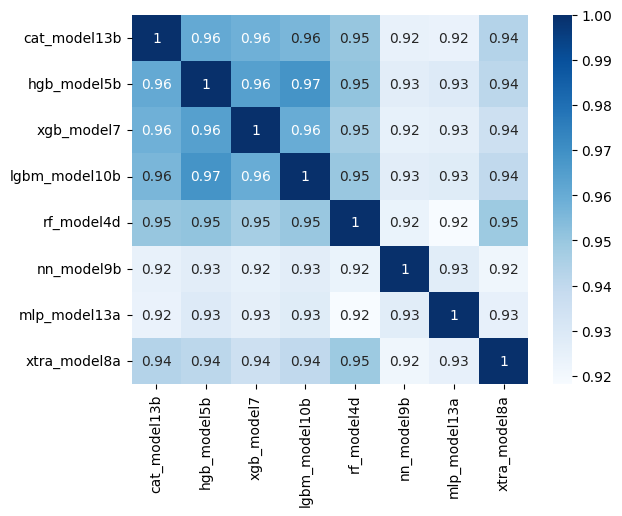

In [ ]:
df = pd.DataFrame(correlation_matrix, columns=models, index=models)

# Visualize the correlation matrix as a heatmap
sns.heatmap(df, annot=True, cmap='Blues')
plt.show()

In [ ]:
ensemble_scores = pd.DataFrame(columns = ['Model_name', 'Model_description', 'CV_accuracy', 'CV_std(+/-)', 'Train_accuracy', 'Test_accuracy'])

In [ ]:
# create voting classifier instance
vtc_model13a = VotingClassifier(estimators = [('cat_c', cat_model13b),
                                             ('nn_b', nn_model9b)],
                                voting = 'hard',
                                n_jobs = -1)
ensemble_score_13a = try_model_scaled(vtc_model13a, 'vtc_model13a', 'Voting(CAT,NN)(Hard)')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 19.8min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.94951941 0.94535685 0.94997351 0.95156285 0.95004919]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9493
Cross validated Train Std dev is: 0.0021
----------------------------------------------------------------------------------------------------
1033/1033 [==============================] - 3s 3ms/step
Train Accuracy is: 0.9682
443/443 [==============================] - 1s 2ms/step
Test Accuracy is: 0.9532


In [ ]:
# add the model performance on scaled data to the comparison dataframe
ensemble_scores = ensemble_scores.append(ensemble_score_13a, ignore_index=True)
ensemble_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
0,vtc_model13a,"Voting(CAT,NN)(Hard)",0.949292,0.002085,0.968153,0.953203


In [ ]:
# predicting for test_data
predict(vtc_model13a, 'vtc_model13a')

557/557 [==============================] - 1s 3ms/step


In [ ]:
# create voting classifier instance
vtc_model13b = VotingClassifier(estimators = [('cat_c', cat_model13b),
                                             ('nn_b', nn_model9b),
                                             ('xtra_a', xtra_model8a)],
                                voting = 'hard',
                                n_jobs = -1)
ensemble_score_13b = try_model_scaled(vtc_model13b, 'vtc_model13b', 'Voting(CAT,NN,XTRA)(Hard)')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 23.2min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95216832 0.95353061 0.95686067 0.95451449 0.9540604 ]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9542
Cross validated Train Std dev is: 0.0015
----------------------------------------------------------------------------------------------------
1033/1033 [==============================] - 3s 3ms/step


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.7s finished


Train Accuracy is: 0.9901
443/443 [==============================] - 1s 3ms/step


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.2s finished


Test Accuracy is: 0.9556


In [ ]:
# add the model performance on scaled data to the comparison dataframe
ensemble_scores = ensemble_scores.append(ensemble_score_13b, ignore_index=True)
ensemble_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
3,vtc_model13b,"Voting(CAT,NN,XTRA)(Hard)",0.954227,0.001534,0.990086,0.95564


In [ ]:
# predicting for test_data
predict(vtc_model13b, 'vtc_model13b')

In [ ]:
# create voting classifier instance
vtc_model13f = VotingClassifier(estimators = [('rf_base', RandomForestClassifier()),
                                             ('xgb_base', XGBClassifier()),
                                             ('lgbm_base', LGBMClassifier()),
                                             ('cat_base', CatBoostClassifier()),
 #                                            ('xtra_a', xtra_model8a),
                                              ('nn_b', nn_model9b)],
                                voting = 'hard',
                                n_jobs = -1)
ensemble_score_13f = try_model_scaled(vtc_model13f, 'vtc_model13f', 'Voting(RF,XGB,LGBM,CAT,NN)(Hard)') #,XTRA

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 21.2min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95277378 0.9536063  0.9562552  0.95496859 0.95436313]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9544
Cross validated Train Std dev is: 0.0012
----------------------------------------------------------------------------------------------------
1033/1033 [==============================] - 2s 2ms/step
Train Accuracy is: 0.9730
443/443 [==============================] - 1s 3ms/step
Test Accuracy is: 0.9569


In [ ]:
# add the model performance on scaled data to the comparison dataframe
ensemble_scores = ensemble_scores.append(ensemble_score_13f, ignore_index=True)
ensemble_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
4,vtc_model13f,"Voting(RF,XGB,LGBM,CAT,NN)(Hard)",0.954393,0.001187,0.973027,0.956912


###### Predict for test data

In [ ]:
# predicting for test_data
predict(vtc_model13f, 'vtc_model13f')

557/557 [==============================] - 1s 2ms/step


In [ ]:
# create voting classifier instance
vtc_model13g = VotingClassifier(estimators = [('rf_a', rf_model4a),
                                             ('xgb', xgb_model7),
                                             ('hgb_c', hgb_model5c),
                                             ('cat_b', cat_model13b),
                                             ('xtra_a', xtra_model8a)],
                                # ('nn_b', nn_model9b)],
                                weights = [1, 1, 1, 2, 1],
                                voting = 'hard',
                                n_jobs = -1)
ensemble_score_13g = try_model_scaled(vtc_model13g, 'vtc_model13g', 'Voting(RF,XGB,LGBM,CAT,NN)(Hard, weighted)') #,XTRA

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.5min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95375766 0.95474154 0.95776886 0.95723908 0.95648225]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9560
Cross validated Train Std dev is: 0.0015
----------------------------------------------------------------------------------------------------


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.3s finished


Train Accuracy is: 0.9891


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.6s finished


Test Accuracy is: 0.9581


In [ ]:
# add the model performance on scaled data to the comparison dataframe
ensemble_scores = ensemble_scores.append(ensemble_score_13g, ignore_index=True)
ensemble_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
5,vtc_model13g,"Voting(RF,XGB,LGBM,CAT,NN)(Hard, weighted)",0.955998,0.001517,0.989117,0.958113


In [ ]:
# predicting for test_data
predict(vtc_model13g, 'vtc_model13g')

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.8s finished


In [ ]:
# create voting classifier instance
vtc_model13h = VotingClassifier(estimators = [('rf_a', rf_model4a),
                                             ('xgb', xgb_model7),
                                             ('hgb_c', hgb_model5c),
                                             ('cat_b', cat_model13b),
                                             ('xtra_a', xtra_model8a)],
                                # ('nn_b', nn_model9b)],
                                weights = [2, 1, 1, 3, 1],
                                voting = 'hard',
                                n_jobs = -1)
ensemble_score_13h = try_model_scaled(vtc_model13h, 'vtc_model13h', 'Voting(RF,XGB,HGB,CAT,XTRA)(Hard, weighted)') #,XTRA

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.7min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95368198 0.95459018 0.9580716  0.95723908 0.95663362]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9560
Cross validated Train Std dev is: 0.0016
----------------------------------------------------------------------------------------------------


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.7s finished


Train Accuracy is: 0.9891


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.0s finished


Test Accuracy is: 0.9581


In [ ]:
# add the model performance on scaled data to the comparison dataframe
ensemble_scores = ensemble_scores.append(ensemble_score_13h, ignore_index=True)
ensemble_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
6,vtc_model13h,"Voting(RF,XGB,HGB,CAT,XTRA)(Hard, weighted)",0.956043,0.001648,0.989117,0.958077


In [ ]:
# predicting for test_data
predict(vtc_model13h, 'vtc_model13h')

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.3s finished


In [ ]:
# create voting classifier instance
vtc_model13i = VotingClassifier(estimators = [('rf_a', rf_model4a),
                                             ('xgb', xgb_model7),
                                             ('hgb_c', hgb_model5c),
                                             ('cat_b', cat_model13b),
                                             ('xtra_a', xtra_model8a)],
                                # ('nn_b', nn_model9b)],
                                weights = [2, 1, 2, 2, 1],
                                voting = 'hard',
                                n_jobs = -1)
ensemble_score_13i = try_model_scaled(vtc_model13i, 'vtc_model13i', 'Voting(RF,XGB,HGB,CAT,XTRA)(Hard, weighted)') #,XTRA

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.6min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95322788 0.95504427 0.95678498 0.9567093  0.9567093 ]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9557
Cross validated Train Std dev is: 0.0014
----------------------------------------------------------------------------------------------------


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.3s finished


Train Accuracy is: 0.9895


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.1s finished


Test Accuracy is: 0.9579


In [ ]:
# add the model performance on scaled data to the comparison dataframe
ensemble_scores = ensemble_scores.append(ensemble_score_13i, ignore_index=True)
ensemble_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
8,vtc_model13i,"Voting(RF,XGB,HGB,CAT,XTRA)(Hard, weighted)",0.955695,0.001397,0.989525,0.957901


In [ ]:
# predicting for test_data
predict(vtc_model13i, 'vtc_model13i')

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.3s finished


In [ ]:
# create voting classifier instance
vtc_model13j = VotingClassifier(estimators = [('rf_a', rf_model4a),
                                             ('xgb', xgb_model7),
                                             ('hgb_c', hgb_model5c),
                                             ('cat_b', cat_model13b),
                                             ('lgbm_b', lgbm_model10b)],
                                # ('nn_b', nn_model9b)],
                                weights = [3, 2, 4, 5, 1],
                                voting = 'hard',
                                n_jobs = -1)
ensemble_score_13j = try_model_scaled(vtc_model13j, 'vtc_model13j', 'Voting(RF,XGB,HGB,CAT,XTRA)(Hard, weighted)') #,XTRA

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.5min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95368198 0.95542269 0.95731477 0.95686067 0.95739045]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9561
Cross validated Train Std dev is: 0.0014
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.9888
Test Accuracy is: 0.9581


In [ ]:
# add the model performance on scaled data to the comparison dataframe
ensemble_scores = ensemble_scores.append(ensemble_score_13j, ignore_index=True)
ensemble_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
9,vtc_model13j,"Voting(RF,XGB,HGB,CAT,XTRA)(Hard, weighted)",0.956134,0.001416,0.988844,0.958148


In [ ]:
# predicting for test_data
predict(vtc_model13j, 'vtc_model13j')

In [ ]:
# create voting classifier instance
vtc_model13k = VotingClassifier(estimators = [('rf_a', rf_model4a),
                                             ('xgb', xgb_model7),
                                             ('hgb_c', hgb_model5c),
                                             ('cat_b', cat_model13b),
                                             ('lgbm_b', lgbm_model10b)],
                                # ('nn_b', nn_model9b)],
                                weights = [3, 1, 1, 2, 1],
                                voting = 'hard',
                                n_jobs = -1)
ensemble_score_13k = try_model_scaled(vtc_model13k, 'vtc_model13k', 'Voting(RF,XGB,HGB,CAT,XTRA)(Hard, weighted)') #,XTRA

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.6min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95262242 0.95459018 0.95723908 0.95708772 0.95739045]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9558
Cross validated Train Std dev is: 0.0019
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.9896
Test Accuracy is: 0.9578


In [ ]:
# add the model performance on scaled data to the comparison dataframe
ensemble_scores = ensemble_scores.append(ensemble_score_13k, ignore_index=True)
ensemble_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
10,vtc_model13k,"Voting(RF,XGB,HGB,CAT,XTRA)(Hard, weighted)",0.955786,0.001888,0.989586,0.95783


In [ ]:
# predicting for test_data
predict(vtc_model13k, 'vtc_model13k')

In [ ]:
# create voting classifier instance
vtc_model13l = VotingClassifier(estimators = [('rf_a', rf_model4a),
                                             ('xgb', xgb_model7),
                                             ('hgb_c', hgb_model5c),
                                             ('cat_b', cat_model13b),
                                             ('lgbm_b', lgbm_model10b)],
                                # ('nn_b', nn_model9b)],
                                weights = [4, 1, 1, 3, 1],
                                voting = 'hard',
                                n_jobs = -1)
ensemble_score_13l = try_model_scaled(vtc_model13l, 'vtc_model13l', 'Voting(RF,XGB,HGB,CAT,XTRA)(Hard, weighted)') #,XTRA

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.4min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95262242 0.95459018 0.95723908 0.95708772 0.95739045]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9558
Cross validated Train Std dev is: 0.0019
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.9896
Test Accuracy is: 0.9578


In [ ]:
# add the model performance on scaled data to the comparison dataframe
ensemble_scores = ensemble_scores.append(ensemble_score_13l, ignore_index=True)
ensemble_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
11,vtc_model13l,"Voting(RF,XGB,HGB,CAT,XTRA)(Hard, weighted)",0.955786,0.001888,0.989586,0.95783


In [ ]:
# predicting for test_data
predict(vtc_model13l, 'vtc_model13l')

In [ ]:
# create voting classifier instance
vtc_model13m = VotingClassifier(estimators = [('rf_a', rf_model4a),
                                             ('xgb', xgb_model7),
                                             ('hgb_c', hgb_model5c),
                                             ('cat_b', cat_model13b)],
                                # ('nn_b', nn_model9b)],
                                weights = [3, 1, 1, 3],
                                voting = 'hard',
                                n_jobs = -1)
ensemble_score_13m = try_model_scaled(vtc_model13m, 'vtc_model13m', 'Voting(RF,XGB,HGB,CAT)(Hard, weighted)') #,XTRA

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.7min finished


----------------------------------------------------------------------------------------------------
Cross validation scores: [0.95330356 0.95496859 0.95754181 0.9571634  0.95701203]
----------------------------------------------------------------------------------------------------
Cross validated Train Accuracy is: 0.9560
Cross validated Train Std dev is: 0.0016
----------------------------------------------------------------------------------------------------
Train Accuracy is: 0.9891
Test Accuracy is: 0.9579


In [ ]:
# add the model performance on scaled data to the comparison dataframe
ensemble_scores = ensemble_scores.append(ensemble_score_13m, ignore_index=True)
ensemble_scores.tail(1)

,Model_name,Model_description,CV_accuracy,CV_std(+/-),Train_accuracy,Test_accuracy
12,vtc_model13m,"Voting(RF,XGB,HGB,CAT)(Hard, weighted)",0.955998,0.001618,0.989117,0.957936


In [ ]:
# predicting for test_data
predict(vtc_model13m, 'vtc_model13m')